In [1]:
import pandas as pd

In [2]:
df_summary = pd.read_excel(r"C:\Users\Akumar\Downloads\DRG_PDX_SDX_BPDX_Total_Appearances_Analysis.xlsx",dtype=str)

In [3]:
df_summary.head()

,InitialCoder,InitialCoderID,ADRG,PRIM_DX,S_DX,BPDX_Occurred_In_SDX,Denied_For_Occcurance,Den%,B_PRIMDX,PDX_changes,Ref_count,Ref%,Denied_After_Ref,Denied_Before_Ref
0,"Alecia, Diemond",1261,071,G9341,N3001,1,1,1,N3001,1,0,0,0,1
1,"Alecia, Diemond",1261,189,J9601,J45901,1,1,1,J45901,1,1,1,1,0
2,"Alecia, Diemond",1261,189,J9622,J441,1,1,1,J441,1,1,1,1,0
3,"Alecia, Diemond",1261,614,D497,E249,1,0,0,E249,1,0,0,0,0
4,"Alecia, Diemond",1261,682,N179,J189,1,1,1,J189,1,1,1,1,0


In [3]:
pip install clickhouse-connect

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 73.9 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import os

import clickhouse_connect

# Show all rows
pd.set_option("display.max_rows", None)

# Show all columns
pd.set_option("display.max_columns", None)

# Make sure wide DataFrames don't wrap
pd.set_option("display.width", None)

# Show the full content of each column (no '...')
pd.set_option("display.max_colwidth", None)

In [2]:
client = clickhouse_connect.get_client(
    host='yaujulxk39.eastus2.azure.clickhouse.cloud',      # or server IP
    port=8443,             # HTTP port (default)
    username='default',
    password='~gZjRLjjOJh1i',
    database='Competitive_Analysis'
)

#dbs = client.query("SHOW TABLES")
#print([row[0] for row in dbs.result_rows])


In [ ]:
"""import os
import pandas as pd

file_path = r"C:\Arun_MIX\DRG_DB_Query_Log.xlsx"

# Ensure folder exists
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Create file with both sheets only if it doesn't exist
if not os.path.exists(file_path):
    with pd.ExcelWriter(file_path, engine="openpyxl") as writer:
        pd.DataFrame().to_excel(writer, sheet_name="Full", index=False)
        pd.DataFrame().to_excel(writer, sheet_name="Humana", index=False)

print("✅ Excel log file ready with sheets: Full, Humana")"""


✅ Excel log file ready with sheets: Full, Humana


In [3]:
import os
import pandas as pd
from datetime import datetime

# ---- Query ----
df_hum = client.query_df("""
    SELECT *
    FROM Competitive_Analysis.DRGHistoricalReviewInformation
    WHERE Client = 'Hum'
""")

"""# ---- Metrics ----
log_df = pd.DataFrame([{
    "Run_Timestamp": datetime.now(),
    "Max_InitialDeterminationDate": df_hum['InitialDeterminationDate'].max(),
    "Total_Claims": len(df_hum),
    "Approved_Claims": (df_hum['InitialDeterminationStatus'] == 'Approved').sum(),
    "Denied_Claims": (df_hum['InitialDeterminationStatus'] == 'Denied').sum(),
    "Total_IDSavings": df_hum['IDSavings'].sum()
}])

# ---- File info ----
log_file = r"C:\Arun-MIX\DRG Analysis Report\DRG_DB_Query_Log.xlsx"

#log_file = r"/content/DRG_DB_Query_Log.xlsx"
sheet_name = "Humana"

# ---- Append safely ----
existing_df = pd.read_excel(log_file, sheet_name=sheet_name)
final_df = pd.concat([existing_df, log_df], ignore_index=True)

with pd.ExcelWriter(
    log_file,
    engine="openpyxl",
    mode="a",
    if_sheet_exists="replace"
) as writer:
    final_df.to_excel(writer, sheet_name=sheet_name, index=False)

print("✅ Metrics successfully appended to Excel log (Humana sheet)")"""


<>:23: SyntaxWarning: invalid escape sequence '\A'
<>:23: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Akumar\AppData\Local\Temp\14\ipykernel_44904\3767331351.py:23: SyntaxWarning: invalid escape sequence '\A'
  log_file = r"C:\Arun-MIX\DRG Analysis Report\DRG_DB_Query_Log.xlsx"


'# ---- Metrics ----\nlog_df = pd.DataFrame([{\n    "Run_Timestamp": datetime.now(),\n    "Max_InitialDeterminationDate": df_hum[\'InitialDeterminationDate\'].max(),\n    "Total_Claims": len(df_hum),\n    "Approved_Claims": (df_hum[\'InitialDeterminationStatus\'] == \'Approved\').sum(),\n    "Denied_Claims": (df_hum[\'InitialDeterminationStatus\'] == \'Denied\').sum(),\n    "Total_IDSavings": df_hum[\'IDSavings\'].sum()\n}])\n\n# ---- File info ----\nlog_file = r"C:\\Arun-MIX\\DRG Analysis Report\\DRG_DB_Query_Log.xlsx"\n\n#log_file = r"/content/DRG_DB_Query_Log.xlsx"\nsheet_name = "Humana"\n\n# ---- Append safely ----\nexisting_df = pd.read_excel(log_file, sheet_name=sheet_name)\nfinal_df = pd.concat([existing_df, log_df], ignore_index=True)\n\nwith pd.ExcelWriter(\n    log_file,\n    engine="openpyxl",\n    mode="a",\n    if_sheet_exists="replace"\n) as writer:\n    final_df.to_excel(writer, sheet_name=sheet_name, index=False)\n\nprint("✅ Metrics successfully appended to Excel log (H

In [4]:
print(df_hum .shape)

print(df_hum['InitialDenialType'].value_counts())

df_hum['InitialDeterminationDate_copy'] = df_hum['InitialDeterminationDate']

print(df_hum['Control_ID'].value_counts().sort_values(ascending=False))

# 1️⃣ Convert to datetime
df_hum['InitialDeterminationDate_copy'] = pd.to_datetime(
    df_hum['InitialDeterminationDate_copy'], 
    errors='coerce'
)

# 2️⃣ Sort by latest date
df_sorted = df_hum.sort_values('InitialDeterminationDate_copy', ascending=False)

# 3️⃣ Keep latest record per ClaimID
df_latest = df_sorted.drop_duplicates(subset='Control_ID', keep='first')
print(df_latest.shape)

df_latest['len_adrg'] = df_latest['ADRG'].astype(str).str.len()

df_hum = df_latest.copy()

# Step 1: Normalize DRG and A_PDX
df_hum['ADRG'] =df_hum['ADRG'].astype(str).str.strip()
df_hum['PRIM_DX'] = df_hum['PRIM_DX'].astype(str).str.strip().str.upper()
df_hum['LOB'] = df_hum['LOB'].astype(str).str.strip().str.upper()
df_hum['PaymentType'] = df_hum['PaymentType'].str.strip().str.upper()

# Step 2: Ensure numeric fields are clean

df_hum['IDSavings'] = pd.to_numeric(df_hum['IDSavings'], errors='coerce').fillna(0)
df_hum['LOS'] = pd.to_numeric(df_hum['LOS'], errors='coerce').fillna(0)
df_hum['AGE'] = pd.to_numeric(df_hum['AGE'], errors='coerce').fillna(0)
df_hum['A_MCCCount'] = pd.to_numeric(df_hum['A_MCCCount'], errors='coerce').fillna(0).astype(int)
df_hum['A_CCCount'] = pd.to_numeric(df_hum['A_CCCount'], errors='coerce').fillna(0).astype(int)

df_hum = df_hum[df_hum["IDSavings"] < 650000].reset_index(drop=True)

print(df_hum.shape)

df_hum['InitialDeterminationStatus_Flag'] = df_hum['InitialDeterminationStatus'].map({
    'Approved': 0,
    'Denied': 1
})

df_hum['InitialDeterminationStatus'] = df_hum['InitialDeterminationStatus'].astype(str).str.strip().str.upper()

df_hum['AGE'] = (
    df_hum['AGE']
        .astype(str)
        .str.strip()
        #.replace('', pd.NA)
        .astype(float)
)

max_age = df_hum["AGE"].max()
# drop invalid ages
df_hum = df_hum[df_hum["AGE"].between(0, max_age)]

# convert to nullable int
df_hum['AGE'] = df_hum['AGE'].astype('Int64')
print(df_hum.shape)

df_hum['LOS'] = (
    df_hum['LOS']
        .astype(str)            # convert to string
        .str.strip()            # remove spaces
        #.replace('', pd.NA)     # replace '' with NaN
        .astype('float')        # convert safely
        .astype('Int64')        # convert to integer (nullable)
)

df_hum = df_hum[df_hum['LOS'] >=0]
print(df_hum.shape)


(70688, 282)
InitialDenialType
Substantive    70688
Name: count, dtype: Int64
Control_ID
HUPTMR-48942    2
HUPTMR-48879    2
HUPTMR-24778    1
HUPTMR-24889    1
HUPTMR-24580    1
HUPTMR-24695    1
HUPTMR-24789    1
HUPTMR-24515    1
HUPTMR-24517    1
HUPTMR-24550    1
HUPTMR-24629    1
HUPTMR-24670    1
HUPTMR-24519    1
HUPTMR-24617    1
HUPTMR-24838    1
HUPTMR-24464    1
HUPTMR-24962    1
HUPTMR-24934    1
HUPTMR-24973    1
HUPTMR-24945    1
HUPTMR-24996    1
HUPTMR-24978    1
HUPTMR-25000    1
HUPTMR-24947    1
HUPTMR-24960    1
HUPTMR-25767    1
HUPTMR-25299    1
HUPTMR-26081    1
HUPTMR-57670    1
HUPTMR-15782    1
HUPTMR-56345    1
HUPTMR-62779    1
HUPTMR-61701    1
HUPTMR-62216    1
HUPTMR-54809    1
HUPTMR-57545    1
HUPTMR-59191    1
HUPTMR-56424    1
HUPTMR-54983    1
HUPTMR-24725    1
HUPTMR-56283    1
HUPTMR-56027    1
HUPTMR-56421    1
HUPTMR-42348    1
HUPTMR-45132    1
HUPTMR-46265    1
HUPTMR-53951    1
HUPTMR-56479    1
HUPTMR-57099    1
HUPRMR-253      1
HUPTMR-5982

C:\Users\Akumar\AppData\Local\Temp\14\ipykernel_44904\1201041371.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest['len_adrg'] = df_latest['ADRG'].astype(str).str.len()


(70686, 284)
(70686, 285)
(70684, 285)


In [8]:
df_hum['PaymentType'].value_counts()

,count
PaymentType,
POSTPAY,62598
PREPAY,8086


In [5]:
df_hum_postpay = df_hum[df_hum['PaymentType']=='POSTPAY']
df_hum_postpay.shape

(62598, 285)

# pretrained model

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
pretrained_embedding = pd.read_json("hf://datasets/attuneengineering/ICD_10_Embedding_Collection/ICD_10_embedding_collection.json")


ImportError: Missing optional dependency 'fsspec'.  Use pip or conda to install fsspec.

In [ ]:
def safe_to_dict(x):
    if isinstance(x, dict): return x
    if isinstance(x, str):
        try: return ast.literal_eval(x)
        except: return {}
    return {}

def safe_embedding(x):
    if isinstance(x, list): return x
    if isinstance(x, str):
        try: return ast.literal_eval(x)
        except: return None
    return None

pretrained_embedding['metadata'] = pretrained_embedding['metadata'].apply(safe_to_dict)
pretrained_embedding = pretrained_embedding.reset_index(drop=True)
meta_df = pd.json_normalize(pretrained_embedding.pop('metadata'))
pretrained_embedding = pd.concat([pretrained_embedding, meta_df], axis=1)

def norm_icd(x):
    return str(x).upper().replace('.', '').strip()

pretrained_embedding['id'] = pretrained_embedding['id'].astype(str).apply(norm_icd)
pretrained_embedding['embedding'] = pretrained_embedding['embedding'].apply(safe_embedding)

EMB_DIM = 512
icd_embedding_map = dict(zip(pretrained_embedding['id'], pretrained_embedding['embedding']))
icd_category_map  = dict(zip(pretrained_embedding['id'], pretrained_embedding['Category']))
icd_text_map      = dict(zip(pretrained_embedding['id'], pretrained_embedding['text']))


In [ ]:
from sklearn.decomposition import PCA

# Example column name: "embedding"
X_emb = np.vstack(pretrained_embedding["embedding"].values)

print(X_emb.shape)  # (n_samples, 512)


pca = PCA(n_components=128, random_state=42)
X_emb_reduced = pca.fit_transform(X_emb)

print(X_emb_reduced.shape)  # (n_samples, 128)
pretrained_embedding["embedding_reduced"] = list(X_emb_reduced)


(74044, 512)


In [ ]:
icd_embedding_map_red = dict(zip(pretrained_embedding['id'], pretrained_embedding['embedding_reduced']))

In [11]:
pretrained_embedding.head(1)

,id,text,embedding,ICD_10_Code,Category,ICD_9_Code,embedding_reduced
0,A710,Initial stage of trachoma,"[0.049649558961391005, 0.038239158689975, 0.11254990845918601, 0.06224598735570901, -0.05778815969824701, -0.010541329160332001, 0.084085248410701, -0.022186892107129003, -0.014160757884383, 0.056397646665573, 0.012667999602854, 0.047441095113754, -0.039343390613794, -0.052962258458137006, 0.058892395347356005, -0.044251091778278004, -0.037973325699567004, -0.014815118163824002, -0.048177249729633005, 0.137088403105735, 0.06584496796131101, 0.005178645253181, 0.021062210202217, -0.054434567689895005, -0.035478577017784, -0.061182651668787, 0.027462668716907, -0.008511791005730001, -0.038259606808423004, 0.029936967417597004, 0.024497600272297002, -0.056111365556716, -0.034701526165008004, 0.007601821795105001, -0.052185203880071, 0.11238631606101901, 0.040079545229673004, 0.057910852134227, -0.11533093452453601, 0.048013661056756, 0.022227788344025, -0.021593878045678, -0.0023579963017250002, -0.035233192145824, -0.0037114478182040003, -0.08613012731075201, 0.018046019598841, 0.0009732326143420001, 0.055170722305774, -0.047195710241794, -0.029855171218514002, -0.029098568484187, -0.016042042523622003, 0.09586372971534701, -0.050590202212333006, -0.085884742438793, 0.0046137487515800005, 0.030345940962433003, -0.08433063328266101, -0.028566900640726003, 0.014937810599803002, 0.061918810009956006, 0.035355884581804005, -0.021471185609698, 0.063268423080444, 0.029364401474595004, 0.017115602269768, -0.006129512097686, -0.009058794938027, 0.07062997668981501, -0.023004841059446002, -0.099053733050823, -0.014978707768023002, -0.000394596921978, -0.008741839788854, 0.078604988753795, -0.046009682118892004, 0.029200810939073, 0.020172689110040002, 0.062736757099628, 0.016113612800836, 0.004726216662675, -0.039793264120817004, -0.044291988015174005, -0.031204789876937002, 0.001515763462521, -0.04915878921747201, -0.041960831731557006, -0.055129822343587, 0.002237859880551, -0.0067174136638640004, 0.025233754888176002, 0.008614035323262001, 0.006037492770701001, -0.013250788673758, 0.00037606526166200004, 0.021368941292166002, -0.041183777153491, 0.037237171083688, -0.009227497503161, ...]",A710,Infectious and parasitic diseases,0760,"[-0.23991134641049042, -0.0533165626239554, -0.06836451586851192, -0.19655305214161606, 0.24910925272449158, 0.045553359230441536, -0.12574415977167758, 0.08418548761468023, 0.08941931581583788, 0.09789899725697125, -0.0017067232362635507, -0.04794946942699775, -0.012194519865116223, -0.06283277541885585, 0.05934022853740711, 0.011946234709436822, 0.0011650917286065675, 0.1027483881076946, 0.024548452908317014, -0.04550354414382636, 0.04536448742377595, -0.07623235102564344, 0.003917888014814595, -0.18229495151407066, 0.0513596639587574, 0.024963208270996802, -0.052699402121220984, 0.022372455520605693, 0.006130106997041959, 0.023495724784377954, 0.014957004000437816, 0.015604645493288216, 0.08576098955575234, -0.046937911084767164, 0.051797020710370234, -0.12525473499718887, 0.061040502866385106, 0.08395437604434783, -0.045176741890387534, -0.014697315222434754, -0.09870861292792257, 0.03634148488499808, -0.028248897353425666, -0.07460366850332506, -0.052608982667867794, 0.0524257293636325, -0.13630229607174119, -0.034810689063158956, -0.03251570140350074, -0.024014391729077114, -0.010614827959854488, 0.005671453633921967, 0.008296828875341954, 0.1698299355719585, 0.10498432893344584, -0.02756381283704255, 0.03302877102292794, 0.025145833085703166, -0.08712816567437413, 0.09579168656823937, 0.0899422867880827, -0.0549141665399739, -0.03804848062019636, -0.10298901982124636, 0.03203584530479317, 0.016771659717804407, -0.010987847119685971, 0.07639390494641214, -0.062442816779042856, 0.036381023580910554, -0.015111277714910469, 0.04788148941822008, 0.046075378721216066, -0.04268289663713942, -0.011042823163051163, -0.0402583127014888, -0.04565952102863721, -0.019515922326046563, -0.057969967348325685, -0.

# Model + Prestrained Model

In [12]:
selected_cols = [
    "Control_ID","PaymentType",	"Group_Type",	"Payments",	"Tax_ID",	"Provider_ID",	"HospitalName","DISP_Code","AGE","LOB",
     "LOS", "ADRG", "PRIM_DX",
    "A_DX2","A_DX3","A_DX4","A_DX5","A_DX6","A_DX7","A_DX8","A_DX9",
    "A_DX10","A_DX11","A_DX12","A_DX13","A_DX14","A_DX15","A_DX16",
    "A_DX17","A_DX18","A_DX19","A_DX20","A_DX21","A_DX22","A_DX23",
    "A_DX24","A_DX25","A_PX1","A_PX2","A_PX3","A_PX4","A_PX5","A_PX6",
    "A_PX7","A_PX8","A_PX9","A_PX10","A_PX11","A_PX12","A_PX13",
    "A_PX14","A_PX15","A_PX16","A_PX17","A_PX18","A_PX19","A_PX20",
    "A_PX21","A_PX22","A_PX23","A_PX24","A_PX25",
    "InitialDeterminationDate",
    "InitialDeterminationStatus", "IDSavings"
]

df_new = df_hum_postpay[selected_cols].copy()
df_new.head()

,Control_ID,PaymentType,Group_Type,Payments,Tax_ID,Provider_ID,HospitalName,DISP_Code,AGE,LOB,LOS,ADRG,PRIM_DX,A_DX2,A_DX3,A_DX4,A_DX5,A_DX6,A_DX7,A_DX8,A_DX9,A_DX10,A_DX11,A_DX12,A_DX13,A_DX14,A_DX15,A_DX16,A_DX17,A_DX18,A_DX19,A_DX20,A_DX21,A_DX22,A_DX23,A_DX24,A_DX25,A_PX1,A_PX2,A_PX3,A_PX4,A_PX5,A_PX6,A_PX7,A_PX8,A_PX9,A_PX10,A_PX11,A_PX12,A_PX13,A_PX14,A_PX15,A_PX16,A_PX17,A_PX18,A_PX19,A_PX20,A_PX21,A_PX22,A_PX23,A_PX24,A_PX25,InitialDeterminationDate,InitialDeterminationStatus,IDSavings
0,HUPTMR-66414,POSTPAY,01,6296.12,730579286,730579286,ST JOHN MEDICAL CENTER,01-ROUTINE/HOME,29,MCD93,3,917,T40411A,G928 - MCC,J9601 - MCC,N179 - CC,T405X1A,T424X1A,J45909,D72829,T40601A,F411,E876,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2026-01-08 14:32:31,APPROVED,0.0
1,HUPTMR-68456,POSTPAY,01,6315.67,264572436,264572436,SOUTHEASTERN REGIONAL MEDICAL,"50-HOSPICE, HOME",58,MEP3I,1,100,R569,E43 - MCC,G9341 - MCC,R571 - MCC,C786 - CC,E8720 - CC,K521 - CC,C7931 - CC,C7951 - CC,C787 - CC,C50811,D72819,Z6841 - CC,E119,D630,I10,J45909,R180 - CC,N179 - CC,E273 - CC,E6601,Z794,D6481,Z515,<NA>,02HV33Z,0W9G30Z,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2026-01-08 13:53:22,APPROVED,0.0
2,HUPTMR-68054,POSTPAY,10,8994.04,590634434,000028258F,ASCENSION SACRED HEART PENSACO,03-TRNSF TO SKILLED NURSING FAC,63,MCD93,4,7102,A419,K8066 - CC,J449,F0393 - CC,I739,F32A,I10,D649,E785,F17210,Z66,Z79899,Z7902,Z86711,Z8673,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0FT44ZZ,BF50200,0FC98ZZ,8E0W4CZ,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2026-01-08 13:04:10,APPROVED,0.0
3,HUPTMR-70402,POSTPAY,01,11959.68,560928089,560928089,NOVANT HEALTH FORSYTH MEDICAL,01-ROUTINE/HOME,74,MRO39,1,482,S72012A,Z85828,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0QS736Z,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2026-01-08 10:17:34,APPROVED,0.0
4,HUPTMR-68791,POSTPAY,01,15578.01,363386394,363386394A,BANNER BAYWOOD MEDICAL,06-TRNSF TO HOME HEALTH,93,3I,6,064,I6389,I618 - MCC,G936 - MCC,D6832 - CC,I69244,E039,I10,I4891,I6523,E785,I2510,M4816,E538,K219,M48061,R739,Z974,Z951,H905,T45515A,R29703,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2026-01-08 10:04:37,APPROVED,0.0


In [13]:
# filter till 2025-12-31 (end of day)
df_train = df_new[df_new['InitialDeterminationDate'] <= '2025-12-31 23:59:59']
df_train.shape

(62114, 65)

In [14]:
# filter till 2025-12-31 (end of day)
df_test= df_new[df_new['InitialDeterminationDate'] > '2025-12-31 23:59:59']
df_test.shape

(484, 65)

In [15]:
df_ml_new = df_train.copy()
df_ml_new.shape

(62114, 65)

In [16]:
df_ml_new["Status_binary"] = df_ml_new["InitialDeterminationStatus"].str.strip().str.lower().map({
    "approved": 1,
    "denied": 0
})

In [17]:
df_ml_new.head(1)

,Control_ID,PaymentType,Group_Type,Payments,Tax_ID,Provider_ID,HospitalName,DISP_Code,AGE,LOB,LOS,ADRG,PRIM_DX,A_DX2,A_DX3,A_DX4,A_DX5,A_DX6,A_DX7,A_DX8,A_DX9,A_DX10,A_DX11,A_DX12,A_DX13,A_DX14,A_DX15,A_DX16,A_DX17,A_DX18,A_DX19,A_DX20,A_DX21,A_DX22,A_DX23,A_DX24,A_DX25,A_PX1,A_PX2,A_PX3,A_PX4,A_PX5,A_PX6,A_PX7,A_PX8,A_PX9,A_PX10,A_PX11,A_PX12,A_PX13,A_PX14,A_PX15,A_PX16,A_PX17,A_PX18,A_PX19,A_PX20,A_PX21,A_PX22,A_PX23,A_PX24,A_PX25,InitialDeterminationDate,InitialDeterminationStatus,IDSavings,Status_binary
667,HUPTMR-57830,POSTPAY,01,13141.26,221487243,221487243B,ROBERT WOOD JOHNSON UNIVERSITY,01-ROUTINE/HOME,77,MEP3I,5,299,E1152,L89153 - MCC,N186 - MCC,I120 - CC,M86672 - CC,D631,Z992,E1142,R4701 - CC,E1169,E1122,Z794,R112,Z1152,M19072,E785,R350,Z98890,Z89412,Z87891,Z83438,Z833,Z8249,Z7982,Z7902,5A1D70Z,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2025-12-31 22:59:01,APPROVED,0.0,1


In [18]:
import numpy as np

adx_cols = [f"A_DX{i}" for i in range(2, 26)]

df_ml_new[adx_cols] = (
    df_ml_new[adx_cols]
    .replace("<NA>", np.nan)
    .astype("string")
    .apply(
        lambda col: (
            col.str.strip()
               .str.upper()
               .str.replace(r"\s*-\s*(MCC|CC)$", "", regex=True)
        )
    )
)

In [19]:
df_ml_new.head(1)

,Control_ID,PaymentType,Group_Type,Payments,Tax_ID,Provider_ID,HospitalName,DISP_Code,AGE,LOB,LOS,ADRG,PRIM_DX,A_DX2,A_DX3,A_DX4,A_DX5,A_DX6,A_DX7,A_DX8,A_DX9,A_DX10,A_DX11,A_DX12,A_DX13,A_DX14,A_DX15,A_DX16,A_DX17,A_DX18,A_DX19,A_DX20,A_DX21,A_DX22,A_DX23,A_DX24,A_DX25,A_PX1,A_PX2,A_PX3,A_PX4,A_PX5,A_PX6,A_PX7,A_PX8,A_PX9,A_PX10,A_PX11,A_PX12,A_PX13,A_PX14,A_PX15,A_PX16,A_PX17,A_PX18,A_PX19,A_PX20,A_PX21,A_PX22,A_PX23,A_PX24,A_PX25,InitialDeterminationDate,InitialDeterminationStatus,IDSavings,Status_binary
667,HUPTMR-57830,POSTPAY,01,13141.26,221487243,221487243B,ROBERT WOOD JOHNSON UNIVERSITY,01-ROUTINE/HOME,77,MEP3I,5,299,E1152,L89153,N186,I120,M86672,D631,Z992,E1142,R4701,E1169,E1122,Z794,R112,Z1152,M19072,E785,R350,Z98890,Z89412,Z87891,Z83438,Z833,Z8249,Z7982,Z7902,5A1D70Z,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2025-12-31 22:59:01,APPROVED,0.0,1


In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# =========================================================
# 1️⃣ Constants
# =========================================================
EMBED_DIM = 512
ADX_RANGE = range(2, 26)

# =========================================================
# 2️⃣ Embedding Utilities
# =========================================================
def get_embedding(code, emb_map, dim=EMBED_DIM):
    """
    Returns embedding vector if exists, else zero vector
    """
    if pd.isna(code):
        return np.zeros(dim, dtype="float32")
    return emb_map.get(str(code).strip().upper(), np.zeros(dim, dtype="float32"))


def stack_embeddings(series, dim=EMBED_DIM):
    """
    Convert Series of embeddings into a (N, dim) float32 matrix
    Fixes invalid / missing embeddings safely
    """
    out = np.zeros((len(series), dim), dtype="float32")
    for i, emb in enumerate(series):
        if isinstance(emb, (list, np.ndarray)) and len(emb) == dim:
            out[i] = emb
    return out

# =========================================================
# 3️⃣ Create Embeddings (PRIM_DX + ADX)
# =========================================================
# Primary Diagnosis
df_ml_new["PRIM_DX_emb"] = df_ml_new["PRIM_DX"].map(
    lambda x: get_embedding(x, icd_embedding_map)
)

# Additional Diagnoses
adx_cols = [f"A_DX{i}" for i in ADX_RANGE if f"A_DX{i}" in df_ml_new.columns]

for col in adx_cols:
    df_ml_new[f"{col}_emb"] = df_ml_new[col].map(
        lambda x: get_embedding(x, icd_embedding_map)
    )

df_ml_new.head(1)

,Control_ID,PaymentType,Group_Type,Payments,Tax_ID,Provider_ID,HospitalName,DISP_Code,AGE,LOB,LOS,ADRG,PRIM_DX,A_DX2,A_DX3,A_DX4,A_DX5,A_DX6,A_DX7,A_DX8,A_DX9,A_DX10,A_DX11,A_DX12,A_DX13,A_DX14,A_DX15,A_DX16,A_DX17,A_DX18,A_DX19,A_DX20,A_DX21,A_DX22,A_DX23,A_DX24,A_DX25,A_PX1,A_PX2,A_PX3,A_PX4,A_PX5,A_PX6,A_PX7,A_PX8,A_PX9,A_PX10,A_PX11,A_PX12,A_PX13,A_PX14,A_PX15,A_PX16,A_PX17,A_PX18,A_PX19,A_PX20,A_PX21,A_PX22,A_PX23,A_PX24,A_PX25,InitialDeterminationDate,InitialDeterminationStatus,IDSavings,Status_binary,PRIM_DX_emb,A_DX2_emb,A_DX3_emb,A_DX4_emb,A_DX5_emb,A_DX6_emb,A_DX7_emb,A_DX8_emb,A_DX9_emb,A_DX10_emb,A_DX11_emb,A_DX12_emb,A_DX13_emb,A_DX14_emb,A_DX15_emb,A_DX16_emb,A_DX17_emb,A_DX18_emb,A_DX19_emb,A_DX20_emb,A_DX21_emb,A_DX22_emb,A_DX23_emb,A_DX24_emb,A_DX25_emb
667,HUPTMR-57830,POSTPAY,01,13141.26,221487243,221487243B,ROBERT WOOD JOHNSON UNIVERSITY,01-ROUTINE/HOME,77,MEP3I,5,299,E1152,L89153,N186,I120,M86672,D631,Z992,E1142,R4701,E1169,E1122,Z794,R112,Z1152,M19072,E785,R350,Z98890,Z89412,Z87891,Z83438,Z833,Z8249,Z7982,Z7902,5A1D70Z,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2025-12-31 22:59:01,APPROVED,0.0,1,"[-0.022059997543692002, 0.014044202864170002, 0.031881004571914, 0.0011520634870970001, -0.021397534757852003, 0.021049743518233, 0.005866932682693, 0.018250839784741003, -0.000547566567547, -0.071678429841995, 0.009837566874921001, -0.054123178124427004, -0.035640478134155, -0.0045006037689740005, -0.050446510314941004, -0.067604288458824, 0.0006355498917400001, 0.026299757882952003, 0.051307711750268006, 0.031715389341115, 0.05458690226078, 0.004525446332991, 0.028535567224025, -0.022474037483334, 0.007129751611500001, 0.0024097070563580004, 0.015360847115516002, 0.041768252849578004, 0.05720362812280601, 0.013870306313037001, -0.012628189288079001, -0.025322625413537, 0.034017443656921005, 0.01854894682765, 0.005875213537365, 0.007858459837734, 0.006603922229260001, 0.046571105718612005, 0.009199946187436001, -0.016561560332775, 0.09267848730087201, -0.052632637321949005, 0.022026874125003003, 0.172902688384056, 0.015940502285957, 0.023136500269174003, 0.022043436765670003, -0.060250956565141005, 0.017919607460498, -0.062668941915035, 0.018035538494586, 0.07300335913896501, -0.00272230640985, 0.127722755074501, -0.069757290184497, 0.09996557980775801, -0.024709846824407, 0.03105292469263, 0.020105734467506003, -0.006148478947579, -0.07128095626831, -0.019377024844288, 0.013630163855850001, 0.07631567120552, -0.017555253580212, -0.06174149736762, -0.017472445964813, 0.011626214720308, -0.09241350740194301, 0.006885468494147001, -0.034315552562475, -0.011485441587865, -0.015402250923216001, 0.021861258894205003, -0.031698826700448005, 0.07783932983875201, -0.017439322546124, -0.006479710340499, 0.023848647251725003, 0.084728941321372, -0.00221096817404, 0.024312369525432, -0.057071134448051, 0.06422573328018101, 0.022639652714133002, -0.096918247640132, -0.038190957158803, -0.091486059129238, -0.08247657120227801, -0.045776151120662, 0.066411852836608, 0.039582129567861, -0.012131342664361002, 0.05458690226078, 0.030026108026504003, 0.084397710859775, -0.065881885588169, -0.043755643069744006, -0.034348674118518004, 0.011477161198854, ...]","[-0.006538807880133, 0.026498625054955004, 0.12110386788845001, 0.039070688188076005, -0.030180580914020004, -0.035197958350181004, 0.0012841532006850002, 0.037277404218912, 0.08821428567171001, -0.03779249638319, 0.038422051817178005, -0.015309681184589, -0.140791833400726, 0.027223570272326, 0.016349405050277002, 0.012276360765099002, 0.098516128957271, -0.037506334483623005, -0.051089502871036, 0.022931136190891002, 0.025563828647136, -0.037315558642148, 0.032736964523792, -0.030504897236824, 0.064825288951396, 0.025468442589044002, 0.010406767949461, 0.000735079345759, -0.031592313200235, 0.003135861596092, 0.05784293264150601, -0.043305888772010005, -0.047693710774183, 0.016158629208803, -0.003

In [21]:
# =========================================================
# FULL DL PIPELINE — SINGLE CELL
# =========================================================

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# -----------------------------
# 1️⃣ Numeric Features
# -----------------------------
num_features = ["Payments", "LOS", "IDSavings"]

X_num = (
    df_ml_new[num_features]
    .apply(pd.to_numeric, errors="coerce")
    .fillna(0.0)
    .values
    .astype("float32")
)

scaler = StandardScaler()
X_num = scaler.fit_transform(X_num).astype("float32")

# -----------------------------
# 2️⃣ Categorical Features (Embedding-ready)
# -----------------------------
cat_features = ["ADRG"]

ord_enc = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

X_cat = ord_enc.fit_transform(df_ml_new[cat_features]).astype("int64")
X_cat[X_cat < 0] = X_cat.max() + 1   # move unknowns to last index

num_categories = int(X_cat.max()) + 1

In [ ]:
# -----------------------------
# 3️⃣ Embeddings
# -----------------------------
def stack_embeddings(col, dim=512):
    out = []
    for emb in col:
        arr = np.asarray(emb, dtype="float32")
        if arr.ndim != 1 or arr.shape[0] != dim:
            arr = np.zeros(dim, dtype="float32")
        out.append(arr)
    return np.vstack(out)

# PRIM DX
X_prim = stack_embeddings(df_ml_new["PRIM_DX_emb"])

# ADX (2 → 25)
adx_blocks = []
for i in range(2, 26):
    col = f"A_DX{i}_emb"
    if col in df_ml_new.columns:
        adx_blocks.append(stack_embeddings(df_ml_new[col]))

: 

In [23]:
# -----------------------------
# 4️⃣ Dense Feature Matrix (NO categorical here)
# -----------------------------
X_dense = np.hstack([X_num, X_prim] + adx_blocks).astype("float32")
print("Dense shape:", X_dense.shape)

# -----------------------------
# 5️⃣ Target
# -----------------------------
y = df_ml_new["Status_binary"].astype("float32").values

: 

: 

In [ ]:
# -----------------------------
# 6️⃣ Train / Validation Split
# -----------------------------
X_d_tr, X_d_va, X_c_tr, X_c_va, y_tr, y_va = train_test_split(
    X_dense, X_cat, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# -----------------------------
# 7️⃣ Torch Tensors & Loader
# -----------------------------
train_ds = TensorDataset(
    torch.tensor(X_d_tr),
    torch.tensor(X_c_tr),
    torch.tensor(y_tr)
)

val_ds = TensorDataset(
    torch.tensor(X_d_va),
    torch.tensor(X_c_va),
    torch.tensor(y_va)
)

train_loader = DataLoader(train_ds, batch_size=256, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=512, shuffle=False)

In [ ]:


# -----------------------------
# 8️⃣ DL Model
# -----------------------------
class ICDTabularDL(nn.Module):
    def __init__(self, dense_dim, num_categories, cat_emb_dim=16):
        super().__init__()

        self.cat_emb = nn.Embedding(num_categories + 1, cat_emb_dim)

        self.net = nn.Sequential(
            nn.Linear(dense_dim + cat_emb_dim, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            nn.Dropout(0.4),

            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(512, 128),
            nn.ReLU(),

            nn.Linear(128, 1)
        )

    def forward(self, x_dense, x_cat):
        cat_vec = self.cat_emb(x_cat).squeeze(1)
        x = torch.cat([x_dense, cat_vec], dim=1)
        return self.net(x).squeeze(1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ICDTabularDL(
    dense_dim=X_dense.shape[1],
    num_categories=num_categories
).to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)

# -----------------------------
# 9️⃣ Training Loop
# -----------------------------
EPOCHS = 15

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for xb_d, xb_c, yb in train_loader:
        xb_d, xb_c, yb = xb_d.to(device), xb_c.to(device), yb.to(device)

        optimizer.zero_grad()
        logits = model(xb_d, xb_c)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Validation
    model.eval()
    preds, trues = [], []

    with torch.no_grad():
        for xb_d, xb_c, yb in val_loader:
            xb_d, xb_c = xb_d.to(device), xb_c.to(device)
            probs = torch.sigmoid(model(xb_d, xb_c)).cpu().numpy()
            preds.extend(probs)
            trues.extend(yb.numpy())

    auc = roc_auc_score(trues, preds)

    print(
        f"Epoch {epoch+1:02d} | "
        f"Loss: {total_loss/len(train_loader):.4f} | "
        f"AUC: {auc:.4f}"
    )

# -----------------------------
# 🔟 Final Prediction
# -----------------------------
model.eval()
with torch.no_grad():
    pred_prob = torch.sigmoid(
        model(
            torch.tensor(X_dense).to(device),
            torch.tensor(X_cat).to(device)
        )
    ).cpu().numpy()


# prev

In [ ]:
# =========================================================
# FULL DL PIPELINE — SINGLE CELL
# =========================================================

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# -----------------------------
# 1️⃣ Numeric Features
# -----------------------------
num_features = ["Payments", "LOS", "IDSavings"]

X_num = (
    df_ml_new[num_features]
    .apply(pd.to_numeric, errors="coerce")
    .fillna(0.0)
    .values
    .astype("float32")
)

scaler = StandardScaler()
X_num = scaler.fit_transform(X_num).astype("float32")

# -----------------------------
# 2️⃣ Categorical Features (Embedding-ready)
# -----------------------------
cat_features = ["ADRG"]

ord_enc = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

X_cat = ord_enc.fit_transform(df_ml_new[cat_features]).astype("int64")
X_cat[X_cat < 0] = X_cat.max() + 1   # move unknowns to last index

num_categories = int(X_cat.max()) + 1

In [ ]:
# -----------------------------
# 3️⃣ Embeddings
# -----------------------------
def stack_embeddings(col, dim=512):
    out = []
    for emb in col:
        arr = np.asarray(emb, dtype="float32")
        if arr.ndim != 1 or arr.shape[0] != dim:
            arr = np.zeros(dim, dtype="float32")
        out.append(arr)
    return np.vstack(out)

# PRIM DX
X_prim = stack_embeddings(df_ml_new["PRIM_DX_emb"])

# ADX (2 → 25)
adx_blocks = []
for i in range(2, 26):
    col = f"A_DX{i}_emb"
    if col in df_ml_new.columns:
        adx_blocks.append(stack_embeddings(df_ml_new[col]))

# -----------------------------
# 4️⃣ Dense Feature Matrix (NO categorical here)
# -----------------------------
X_dense = np.hstack([X_num, X_prim] + adx_blocks).astype("float32")
print("Dense shape:", X_dense.shape)

In [ ]:
# -----------------------------
# 5️⃣ Target
# -----------------------------
y = df_ml_new["Status_binary"].astype("float32").values

# -----------------------------
# 6️⃣ Train / Validation Split
# -----------------------------
X_d_tr, X_d_va, X_c_tr, X_c_va, y_tr, y_va = train_test_split(
    X_dense, X_cat, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# -----------------------------
# 7️⃣ Torch Tensors & Loader
# -----------------------------
train_ds = TensorDataset(
    torch.tensor(X_d_tr),
    torch.tensor(X_c_tr),
    torch.tensor(y_tr)
)

val_ds = TensorDataset(
    torch.tensor(X_d_va),
    torch.tensor(X_c_va),
    torch.tensor(y_va)
)

train_loader = DataLoader(train_ds, batch_size=256, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=512, shuffle=False)

In [ ]:
# -----------------------------
# 8️⃣ DL Model
# -----------------------------
class ICDTabularDL(nn.Module):
    def __init__(self, dense_dim, num_categories, cat_emb_dim=16):
        super().__init__()

        self.cat_emb = nn.Embedding(num_categories + 1, cat_emb_dim)

        self.net = nn.Sequential(
            nn.Linear(dense_dim + cat_emb_dim, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            nn.Dropout(0.4),

            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(512, 128),
            nn.ReLU(),

            nn.Linear(128, 1)
        )

    def forward(self, x_dense, x_cat):
        cat_vec = self.cat_emb(x_cat).squeeze(1)
        x = torch.cat([x_dense, cat_vec], dim=1)
        return self.net(x).squeeze(1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ICDTabularDL(
    dense_dim=X_dense.shape[1],
    num_categories=num_categories
).to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)

In [ ]:
# -----------------------------
# 9️⃣ Training Loop
# -----------------------------
EPOCHS = 15

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for xb_d, xb_c, yb in train_loader:
        xb_d, xb_c, yb = xb_d.to(device), xb_c.to(device), yb.to(device)

        optimizer.zero_grad()
        logits = model(xb_d, xb_c)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Validation
    model.eval()
    preds, trues = [], []

    with torch.no_grad():
        for xb_d, xb_c, yb in val_loader:
            xb_d, xb_c = xb_d.to(device), xb_c.to(device)
            probs = torch.sigmoid(model(xb_d, xb_c)).cpu().numpy()
            preds.extend(probs)
            trues.extend(yb.numpy())

    auc = roc_auc_score(trues, preds)

    print(
        f"Epoch {epoch+1:02d} | "
        f"Loss: {total_loss/len(train_loader):.4f} | "
        f"AUC: {auc:.4f}"
    )

In [ ]:
# -----------------------------
# 🔟 Final Prediction
# -----------------------------
model.eval()
with torch.no_grad():
    pred_prob = torch.sigmoid(
        model(
            torch.tensor(X_dense).to(device),
            torch.tensor(X_cat).to(device)
        )
    ).cpu().numpy()


# prev

In [19]:
# =========================================================
# 4️⃣ Numeric Features (Dense)
# =========================================================
num_features = ["Payments", "LOS", "IDSavings"]

X_num_dense = (
    df_ml_new[num_features]
    .apply(pd.to_numeric, errors="coerce")
    .fillna(0.0)
    .astype("float32")
    .values
)

# =========================================================
# 5️⃣ Categorical Features (Ordinal – Fast)
# =========================================================
cat_features = ["ADRG"]

ordinal_enc = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

X_cat_dense = ordinal_enc.fit_transform(
    df_ml_new[cat_features]
).astype("int32")

print("Categorical shape:", X_cat_dense.shape)

# =========================================================
# 6️⃣ Stack Embeddings (KEEP ADX SEPARATE)
# =========================================================
# PRIM DX
X_prim_dense = stack_embeddings(df_ml_new["PRIM_DX_emb"])
print("PRIM_DX shape:", X_prim_dense.shape)

# ADX embeddings → separate matrices (NO list)
adx_emb_cols = [
    f"A_DX{i}_emb"
    for i in ADX_RANGE
    if f"A_DX{i}_emb" in df_ml_new.columns
]

X_adx_dense = {}

for col in adx_emb_cols:
    X_adx_dense[col] = stack_embeddings(df_ml_new[col])
    print(f"{col} shape:", X_adx_dense[col].shape)




Categorical shape: (62114, 1)
PRIM_DX shape: (62114, 128)
A_DX2_emb shape: (62114, 128)
A_DX3_emb shape: (62114, 128)
A_DX4_emb shape: (62114, 128)
A_DX5_emb shape: (62114, 128)
A_DX6_emb shape: (62114, 128)
A_DX7_emb shape: (62114, 128)
A_DX8_emb shape: (62114, 128)
A_DX9_emb shape: (62114, 128)
A_DX10_emb shape: (62114, 128)
A_DX11_emb shape: (62114, 128)
A_DX12_emb shape: (62114, 128)
A_DX13_emb shape: (62114, 128)
A_DX14_emb shape: (62114, 128)
A_DX15_emb shape: (62114, 128)
A_DX16_emb shape: (62114, 128)
A_DX17_emb shape: (62114, 128)
A_DX18_emb shape: (62114, 128)
A_DX19_emb shape: (62114, 128)
A_DX20_emb shape: (62114, 128)
A_DX21_emb shape: (62114, 128)
A_DX22_emb shape: (62114, 128)
A_DX23_emb shape: (62114, 128)
A_DX24_emb shape: (62114, 128)
A_DX25_emb shape: (62114, 128)


In [ ]:
# ADX embedding blocks in correct order
adx_blocks = [
    X_adx_dense[f"A_DX{i}_emb"]
    for i in range(2, 26)
    if f"A_DX{i}_emb" in X_adx_dense
]

# Dense block (NO value combination, only horizontal stacking)
X_dense = np.hstack(
    [X_num_dense, X_cat_dense, X_prim_dense] + adx_blocks
)

print("Dense :", X_dense.shape)

from scipy import sparse
X_dense_sparse = sparse.csr_matrix(X_dense)


Dense : (62114, 3204)


: 

: 

: 

In [ ]:
df_ml_new.head(1)

In [ ]:

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve,
)
import matplotlib.pyplot as plt
from lightgbm import early_stopping

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

oof_prob = np.zeros(len(df_ml_new), dtype=np.float32)





# ---------------------------------------------------------
# 3. MODEL PARAMETERS
# ---------------------------------------------------------
params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": "auc",
    "learning_rate": 0.012234187375152963,
    "num_leaves": 152,
    "max_depth": 18,
    "feature_fraction": 0.6188224522873605,
    "bagging_fraction": 0.730474628222675,
    "bagging_freq": 4,
    "min_data_in_leaf": 81,
    "lambda_l1": 3.0943746530297718,
    "lambda_l2": 0.5650792329143572,
    "verbosity": -1
}


for fold, (tr_idx, val_idx) in enumerate(
    skf.split(X_dense_sparse, df_ml_new['Status_binary'])
):
    print(f"Fold {fold + 1}")

    X_tr, X_val = X_dense_sparse[tr_idx], df_ml_new[val_idx]

    y_tr = df_ml_new['Status_binary'].iloc[tr_idx].to_numpy(dtype='float32')
    y_val = df_ml_new['Status_binary'].iloc[val_idx].to_numpy(dtype='float32')

   # w_tr = df_ml['final_weight'].iloc[tr_idx].to_numpy(dtype='float32')
    #w_val = df_ml['final_weight'].iloc[val_idx].to_numpy(dtype='float32')

    train_data = lgb.Dataset(
        X_tr,
        label=y_tr,
       # weight=w_tr,
        free_raw_data=False
    )

    val_data = lgb.Dataset(
        X_val,
        label=y_val,
       # weight=w_val,
        free_raw_data=False
    )

    model_cv = lgb.train(
        params=params,
        train_set=train_data,
        valid_sets=[val_data],
        num_boost_round=500,
        callbacks=[lgb.early_stopping(30, verbose=False)]
    )

    oof_prob[val_idx] = model_cv.predict(
        X_val, num_iteration=model_cv.best_iteration
    )




: 

: 

In [ ]:
prec, rec, thr = precision_recall_curve(
    df_ml['Status_binary'].to_numpy(),
    oof_prob
)

f1 = 2 * prec * rec / (prec + rec + 1e-9)

best_thr = thr[np.argmax(f1)]
best_f1 = np.max(f1)

print("Best Threshold:", round(best_thr, 4))
print("Best F1:", round(best_f1, 4))


# prev

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class QueryAttentionPooling(nn.Module):
    def __init__(self, embedding_dim=512):
        super().__init__()
        self.query = nn.Parameter(torch.randn(embedding_dim))

    def forward(self, x):
        """
        x: tensor shape (N_codes, embedding_dim)
        returns: pooled vector (embedding_dim,)
        """
        if x.ndim == 1:
            return x

        q = F.normalize(self.query, dim=0)   # (D,)
        x_norm = F.normalize(x, dim=1)       # (N, D)

        scores = torch.matmul(x_norm, q)      # (N,)
        weights = F.softmax(scores, dim=0)    # (N,)

        pooled = torch.sum(x * weights.unsqueeze(1), dim=0)
        return pooled

att_layer = QueryAttentionPooling(embedding_dim=512)

def pool_sdx_attention(emb_list):
    if len(emb_list) == 0:
        return np.zeros(512)

    x = torch.tensor(np.vstack(emb_list), dtype=torch.float32)
    pooled = att_layer(x).detach().numpy()
    return pooled

df_ml['SDX_agg_emb'] = df_ml['SDX_Set_embeddings'].apply(pool_sdx_attention)


In [ ]:
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import OrdinalEncoder

# ---------------------------------------------------
# 1. Numeric (dense)
# ---------------------------------------------------
num_features = ['Payments',  'LOS']
df_ml[num_features] = df_ml[num_features].apply(pd.to_numeric, errors='coerce').fillna(0.0)
X_num_dense = df_ml[num_features].astype('float32').values


# ---------------------------------------------------
# 2. Categorical (sparse hashing)
# ---------------------------------------------------

cat_features = ['ADRG', 'A_DX_Type']

ordinal_enc = OrdinalEncoder(
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

X_cat_dense = ordinal_enc.fit_transform(df_ml[cat_features]).astype('int32')

print(X_cat_dense.shape)

# ---------------------------------------------------
# 3. Embeddings (dense)
# ---------------------------------------------------
def fix_emb(col, dim=512):
    fixed = []
    for emb in col:
        arr = np.asarray(emb, dtype='float32')
        if arr.ndim != 1 or arr.shape[0] != dim:
            arr = np.zeros(dim, dtype='float32')
        fixed.append(arr)
    return np.vstack(fixed)

X_prim_dense = fix_emb(df_ml['PRIM_DX_emb'])
X_sdx_dense  = fix_emb(df_ml['SDX_agg_emb'])

/


(62114, 2)
Dense : (62114, 516)


In [ ]:
from scipy import sparse
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve,
)
import matplotlib.pyplot as plt
from lightgbm import early_stopping


# ---------------------------------------------------------
# 1. CLASS WEIGHT (to fix 70-30 imbalance)
# ---------------------------------------------------------
class_counts = df_ml['Status_binary'].value_counts()

class_weight = {
    0: 1,
    1: (class_counts[0] / class_counts[1])
}

df_ml['sample_weight'] = df_ml['Status_binary'].map(class_weight)

print("Class Weights:", class_weight)


# ---------------------------------------------------------
# 2. COMBINE BOTH WEIGHTS  (BEST METHOD)
# ---------------------------------------------------------
df_ml['final_weight'] =  df_ml['sample_weight']

# -----------------------------
# 0. Combine features
# -----------------------------
X_dense_sparse = sparse.csr_matrix(X_dense)
X_full = sparse.csr_matrix(X_dense)
print("Full feature shape:", X_full.shape)

Class Weights: {0: 1, 1: np.float64(0.14186444105373458)}
Full feature shape: (62114, 516)


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

oof_prob = np.zeros(len(df_ml), dtype=np.float32)


# ---------------------------------------------------------
# 3. MODEL PARAMETERS
# ---------------------------------------------------------
params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "metric": "auc",
    "learning_rate": 0.012234187375152963,
    "num_leaves": 152,
    "max_depth": 18,
    "feature_fraction": 0.6188224522873605,
    "bagging_fraction": 0.730474628222675,
    "bagging_freq": 4,
    "min_data_in_leaf": 81,
    "lambda_l1": 3.0943746530297718,
    "lambda_l2": 0.5650792329143572,
    "verbosity": -1
}


for fold, (tr_idx, val_idx) in enumerate(
    skf.split(X_full, df_ml['Status_binary'])
):
    print(f"Fold {fold + 1}")

    X_tr, X_val = X_full[tr_idx], X_full[val_idx]

    y_tr = df_ml['Status_binary'].iloc[tr_idx].to_numpy(dtype='float32')
    y_val = df_ml['Status_binary'].iloc[val_idx].to_numpy(dtype='float32')

   # w_tr = df_ml['final_weight'].iloc[tr_idx].to_numpy(dtype='float32')
    #w_val = df_ml['final_weight'].iloc[val_idx].to_numpy(dtype='float32')

    train_data = lgb.Dataset(
        X_tr,
        label=y_tr,
       # weight=w_tr,
        free_raw_data=False
    )

    val_data = lgb.Dataset(
        X_val,
        label=y_val,
       # weight=w_val,
        free_raw_data=False
    )

    model_cv = lgb.train(
        params=params,
        train_set=train_data,
        valid_sets=[val_data],
        num_boost_round=500,
        callbacks=[lgb.early_stopping(30, verbose=False)]
    )

    oof_prob[val_idx] = model_cv.predict(
        X_val, num_iteration=model_cv.best_iteration
    )


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


In [ ]:
prec, rec, thr = precision_recall_curve(
    df_ml['Status_binary'].to_numpy(),
    oof_prob
)

f1 = 2 * prec * rec / (prec + rec + 1e-9)

best_thr = thr[np.argmax(f1)]
best_f1 = np.max(f1)

print("Best Threshold:", round(best_thr, 4))
print("Best F1:", round(best_f1, 4))


Best Threshold: 0.5223
Best F1: 0.9354


In [ ]:
target_recall = 0.85   # example
idx = np.where(rec >= target_recall)[0][0]
best_thr = thr[idx]

print("Threshold for Recall ≥ 85%:", round(best_thr, 4))


Threshold for Recall ≥ 85%: 0.2994


In [ ]:
DENIAL_THRESHOLD = best_thr
DENIAL_THRESHOLD

np.float32(0.29938033)

# test

In [ ]:
df_test.head()

In [ ]:
import numpy as np
import pandas as pd
from scipy import sparse
import torch

df_test = df_test.copy()

# =========================================================
# 1. NUMERIC FEATURES
# =========================================================
num_features = ['Payments', 'LOS']

df_test[num_features] = (
    df_test[num_features]
    .apply(pd.to_numeric, errors='coerce')
    .fillna(0.0)
)

X_num_test = df_test[num_features].astype('float32').values


# =========================================================
# 2. CATEGORICAL FEATURES (ORDINAL ENCODER - TRANSFORM ONLY)
# =========================================================
cat_features = ['ADRG', 'A_DX_Type']

X_cat_test = ordinal_enc.transform(df_test[cat_features]).astype('int32')


# =========================================================
# 3. EMBEDDING HELPERS (SAME AS TRAINING)
# =========================================================
def get_embedding(code, emb_map, dim=512):
    return emb_map.get(code, np.zeros(dim, dtype='float32'))

def map_icd_embeddings(icd_list, emb_map, dim=512):
    icd_list = list(icd_list)
    return [get_embedding(c, emb_map, dim) for c in icd_list]

def fix_emb(col, dim=512):
    fixed = []
    for emb in col:
        arr = np.asarray(emb, dtype='float32')
        if arr.ndim != 1 or arr.shape[0] != dim:
            arr = np.zeros(dim, dtype='float32')
        fixed.append(arr)
    return np.vstack(fixed)


# =========================================================
# 4. PRIMARY DX EMBEDDING
# =========================================================
df_test['PRIM_DX_emb'] = df_test['PRIM_DX'].apply(
    lambda x: get_embedding(x, icd_embedding_map, 512)
)


# =========================================================
# 5. SDX EMBEDDINGS + ATTENTION POOLING
# =========================================================
df_test['SDX_Set_embeddings'] = df_test['SDX_Set_tuple'].apply(
    lambda x: map_icd_embeddings(x, icd_embedding_map, 512)
)

def pool_sdx_attention(emb_list):
    if len(emb_list) == 0:
        return np.zeros(512, dtype='float32')
    x = torch.tensor(np.vstack(emb_list), dtype=torch.float32)
    pooled = att_layer(x).detach().numpy()
    return pooled

df_test['SDX_agg_emb'] = df_test['SDX_Set_embeddings'].apply(pool_sdx_attention)


# =========================================================
# 6. FIX EMBEDDING SHAPES
# =========================================================
X_prim_test = fix_emb(df_test['PRIM_DX_emb'])
X_sdx_test  = fix_emb(df_test['SDX_agg_emb'])


In [ ]:
# =========================================================
# 7. FINAL FEATURE MATRIX (ORDER MUST MATCH TRAINING)
# =========================================================
X_test_dense = np.hstack([
    X_num_test,
    X_cat_test,
    X_prim_test,
   # X_sdx_test
])

X_test_full = sparse.csr_matrix(X_test_dense)

print("Test feature shape:", X_test_full.shape)


# =========================================================
# 8. MODEL PREDICTION
# =========================================================
#df_test['pred_prob'] = model_cv.predict(X_test_full)
df_test['pred_prob'] = model_cv.predict(X_test_full, raw_score=False)



# =========================================================
# 9. APPLY TRAINED THRESHOLD
# =========================================================
df_test['pred_label'] = (df_test['pred_prob'] >= DENIAL_THRESHOLD).astype(int)

df_test['prediction'] = df_test['pred_label'].map({
    1: 'Denied',
    0: 'Approved'
})




Test feature shape: (484, 516)


In [ ]:
import numpy as np

raw_pred = model_cv.predict(X_test_full, raw_score=True)
df_test['pred_prob1'] = 1 / (1 + np.exp(-raw_pred))


In [ ]:
# =========================================================
# 10. FINAL OUTPUT
# =========================================================
df = df_test[['Control_ID',	'ADRG',	'PRIM_DX',		'A_DX_Type',	'LOS',
         	'Payments',	'InitialDeterminationStatus',	'pred_prob','pred_prob1','pred_label',	'prediction']]


In [ ]:
df['pred_prob'].min()

np.float64(0.8188642307440316)

In [ ]:
type(model_cv)


lightgbm.basic.Booster

In [ ]:
df.to_excel("test1.xlsx",index=False)

In [ ]:
df.tail(50)

,Control_ID,ADRG,PRIM_DX,A_DX_Type,LOS,Payments,InitialDeterminationStatus,pred_prob,pred_prob1,pred_label,prediction
550,HUPTMR-67037,175,I2699,MCC,3,8594.40,APPROVED,0.883317,0.883317,1,Denied
551,HUPTMR-68726,917,T50991A,MCC,9,11029.82,APPROVED,0.882676,0.882676,1,Denied
552,HUPTMR-66993,189,J9621,MCC,3,8799.45,APPROVED,0.872014,0.872014,1,Denied
553,HUPTMR-54686,637,E1110,MCC,9,11405.45,APPROVED,0.884620,0.884620,1,Denied
554,HUPTMR-67164,023,I63411,MCC,8,40570.41,APPROVED,0.882874,0.882874,1,Denied
555,HUPTMR-63570,078,I674,CC,6,6221.26,APPROVED,0.878683,0.878683,1,Denied
556,HUPTMR-68337,393,K648,MCC,3,16092.78,APPROVED,0.884534,0.884534,1,Denied
557,HUPTMR-68638,190,J441,MCC,2,7423.85,APPROVED,0.877182,0.877182,1,Denied
558,HUPTMR-68084,378,K31811,MCC,4,7088.31,APPROVED,0.885110,0.885110,1,Denied
559,HUPTMR-68361,602,L03115,MCC,6,11140.79,APPROVED,0.884317,0.884317,1,Denied


# prev

In [ ]:
# ---------------------------------------------------------
# 1. FULL TRAINING DATA
# ---------------------------------------------------------
X_train = X_full
y_train = df_ml['Status_binary']
w_train = df_ml['final_weight']


print("Training size:", X_train.shape)


# ---------------------------------------------------------
# 2. LIGHTGBM TRAIN DATASET
# ---------------------------------------------------------
train_data = lgb.Dataset(
    X_train,
    label=y_train.to_numpy(dtype='float32'),
    weight=w_train.to_numpy(dtype='float32'),
    free_raw_data=False
)




# ---------------------------------------------------------
# 4. TRAIN MODEL (NO VALIDATION)
# ---------------------------------------------------------
model = lgb.train(
    params=params,
    train_set=train_data,
    num_boost_round=500
)


Training size: (62114, 1028)


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

oof_prob = np.zeros(len(df_ml))

for fold, (tr_idx, val_idx) in enumerate(skf.split(X_full, df_ml['Status_binary'])):
    print(f"Fold {fold+1}")

    X_tr, X_val = X_full[tr_idx], X_full[val_idx]
    y_tr, y_val = df_ml['Status_binary'].iloc[tr_idx], df_ml['Status_binary'].iloc[val_idx]
    w_tr, w_val = df_ml['final_weight'].iloc[tr_idx], df_ml['final_weight'].iloc[val_idx]

    train_data = lgb.Dataset(X_tr, label=y_tr, weight=w_tr)
    val_data   = lgb.Dataset(X_val, label=y_val, weight=w_val)

    model_cv = lgb.train(
        params=params,
        train_set=train_data,
        valid_sets=[val_data],
        num_boost_round=500,
        callbacks=[lgb.early_stopping(30, verbose=False)]
    )

    oof_prob[val_idx] = model_cv.predict(X_val)


Fold 1


ValueError: Unable to avoid copy while creating an array as requested.
If using `np.array(obj, copy=False)` replace it with `np.asarray(obj)` to allow a copy when needed (no behavior change in NumPy 1.x).
For more details, see https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword.

In [ ]:
prec, rec, thr = precision_recall_curve(df_ml['Status_binary'], oof_prob)

NameError: name 'oof_prob' is not defined

In [ ]:
target_recall = 0.85   # example

idx = np.where(rec >= target_recall)[0][0]
best_thr = thr[idx]

print("Threshold for Recall ≥ 85%:", round(best_thr, 4))


# prev

In [ ]:
# ---------------------------------------------------------
# 3. TRAIN-TEST SPLIT  (use final_weight)
# ---------------------------------------------------------
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X_full,
    df_ml['Status_binary'],
    df_ml['final_weight'],         # combined weight
    test_size=0.2,
    random_state=42,
    stratify=df_ml['Status_binary']
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (49691, 1028)
Test size: (12423, 1028)


In [ ]:
# ---------------------------------------------------------
# 4. LIGHTGBM DATASETS
# ---------------------------------------------------------
train_data = lgb.Dataset(
    X_train,
    label=y_train,
    weight=w_train,
    free_raw_data=False
)

valid_data = lgb.Dataset(
    X_test,
    label=y_test,
    weight=w_test,
    free_raw_data=False
)

In [ ]:
!python -m pip uninstall numpy -y
!python -m pip install numpy==1.26.4


Found existing installation: numpy 2.3.3
Uninstalling numpy-2.3.3:
  Successfully uninstalled numpy-2.3.3


You can safely remove it manually.
You can safely remove it manually.


     ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
     -- ------------------------------------- 1.0/15.8 MB 6.3 MB/s eta 0:00:03
     ------- -------------------------------- 2.9/15.8 MB 8.1 MB/s eta 0:00:02
     ------------- -------------------------- 5.2/15.8 MB 9.0 MB/s eta 0:00:02
     --------------- ------------------------ 6.3/15.8 MB 8.3 MB/s eta 0:00:02
     ----------------- ---------------------- 6.8/15.8 MB 7.2 MB/s eta 0:00:02
     ------------------ --------------------- 7.3/15.8 MB 6.4 MB/s eta 0:00:02
     ------------------- -------------------- 7.9/15.8 MB 5.8 MB/s eta 0:00:02
     --------------------- ------------------ 8.7/15.8 MB 5.3 MB/s eta 0:00:02
     ----------------------- ---------------- 9.2/15.8 MB 5.1 MB/s eta 0:00:02
     ------------------------- -------------- 10.0/15.8 MB 4.9 MB/s eta 0:00:02
     -------------------------- ------------- 10.5/15.8 MB 4.8 MB/s eta 0:00:02
     ---------------------------- ----------- 11.3/15.8 M

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ml-dtypes 0.5.3 requires numpy>=2.1.0; python_version >= "3.13", but you have numpy 1.26.4 which is incompatible.


In [ ]:
params = {
    "objective": "binary",
    "boosting_type":"gbdt",
    "metric": "auc",
    "learning_rate": 0.012234187375152963,
    "num_leaves": 152,
    "max_depth": 18,
    "feature_fraction": 0.6188224522873605,
    "bagging_fraction": 0.730474628222675,
    "bagging_freq": 4,
    "min_data_in_leaf": 81,
    "lambda_l1": 3.0943746530297718,
    "lambda_l2": 0.5650792329143572,
    "n_estimators": 500
}


model = lgb.train(
    params=params,
    train_set=train_data,
    valid_sets=[train_data, valid_data],
    valid_names=['train', 'valid'],
    num_boost_round=500,
    callbacks=[early_stopping(stopping_rounds=30)]

)

c:\Users\Arunkumara\AppData\Local\Programs\Python\Python313\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 49691
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.365339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260681
[LightGBM] [Info] Number of data points in the train set: 49691, number of used features: 1028
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the s

In [ ]:
# ---------------------------------------------------------
# 7. PREDICTIONS (probabilities only)
# ---------------------------------------------------------
y_prob = model.predict(X_test)


# ---------------------------------------------------------
# 8. FIND BEST THRESHOLD (based on F1-score)
# ---------------------------------------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_thr = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

print("\n🔹 Best Threshold:", round(best_thr, 4))
print("🔹 Best F1-score:", round(best_f1, 4))


# ---------------------------------------------------------
# 9. FINAL PREDICTIONS USING BEST THRESHOLD
# ---------------------------------------------------------
y_pred = (y_prob >= 0.41).astype(int)


🔹 Best Threshold: 0.0
🔹 Best F1-score: 0.9338


In [ ]:
import seaborn as sns

c:\Users\Arunkumara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Arunkumara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Arunkumara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_


--- MODEL PERFORMANCE (Optimized Threshold) ---
AUC:       0.5000
Accuracy:  0.1242
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000

--- Classification Report (Optimized Threshold) ---
              precision    recall  f1-score   support

           0       0.12      1.00      0.22      1543
           1       0.00      0.00      0.00     10880

    accuracy                           0.12     12423
   macro avg       0.06      0.50      0.11     12423
weighted avg       0.02      0.12      0.03     12423



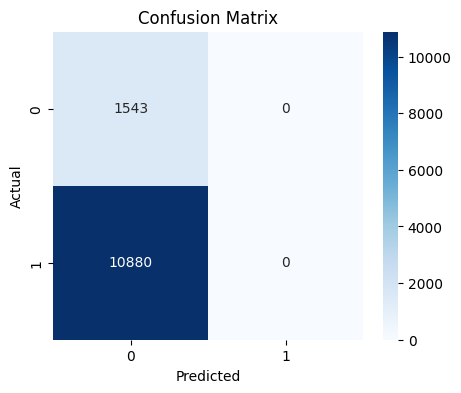

In [ ]:

# ---------------------------------------------------------
# 10. METRICS (using optimized threshold)
# ---------------------------------------------------------
auc = roc_auc_score(y_test, y_prob)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- MODEL PERFORMANCE (Optimized Threshold) ---")
print(f"AUC:       {auc:.4f}")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# ---------------------------------------------------------
# 13. CLASSIFICATION REPORT
# ---------------------------------------------------------
print("\n--- Classification Report (Optimized Threshold) ---")
print(classification_report(y_test, y_pred))

# ---------------------------------------------------------
# 11. CONFUSION MATRIX 
# ---------------------------------------------------------

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# prev

In [ ]:
# =========================================================
# 1️⃣ Imports
# =========================================================
import pandas as pd
#import numpy as np
import ast
import torch
import torch.nn as nn
import torch.nn.functional as F
import xgboost as xgb
import shap
from sklearn.isotonic import IsotonicRegression
from openai import OpenAI
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import base64
import os

In [ ]:
# Set your OpenAI API key
os.environ["OPENAI_API_KEY"] = "YOUR_OPENAI_API_KEY"
client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])

# =========================================================
# 2️⃣ Load & Clean ICD Embeddings
# =========================================================
pretrained_embedding = pd.read_json("hf://datasets/attuneengineering/ICD_10_Embedding_Collection/ICD_10_embedding_collection.json")

In [ ]:
def safe_to_dict(x):
    if isinstance(x, dict): return x
    if isinstance(x, str):
        try: return ast.literal_eval(x)
        except: return {}
    return {}

def safe_embedding(x):
    if isinstance(x, list): return x
    if isinstance(x, str):
        try: return ast.literal_eval(x)
        except: return None
    return None

pretrained_embedding['metadata'] = pretrained_embedding['metadata'].apply(safe_to_dict)
pretrained_embedding = pretrained_embedding.reset_index(drop=True)
meta_df = pd.json_normalize(pretrained_embedding.pop('metadata'))
pretrained_embedding = pd.concat([pretrained_embedding, meta_df], axis=1)

def norm_icd(x):
    return str(x).upper().replace('.', '').strip()

pretrained_embedding['id'] = pretrained_embedding['id'].astype(str).apply(norm_icd)
pretrained_embedding['embedding'] = pretrained_embedding['embedding'].apply(safe_embedding)

EMB_DIM = 512
icd_embedding_map = dict(zip(pretrained_embedding['id'], pretrained_embedding['embedding']))
icd_category_map  = dict(zip(pretrained_embedding['id'], pretrained_embedding['Category']))
icd_text_map      = dict(zip(pretrained_embedding['id'], pretrained_embedding['text']))


In [ ]:
df_train.head(1)

,ADRG,PRIM_DX,A_DX_Set,A_DX_Type,LOS,InitialDeterminationStatus,IDSavings,InitialDeterminationDate,SDX_Set_tuple
667,299,E1152,"[L89153, N186]",MCC,5,APPROVED,0.0,2025-12-31 22:59:01,"(L89153, N186)"


In [ ]:
df_ml = df_train.copy()

In [ ]:
import numpy as np
import ast

# ---------------------------------------
# Helper: return embedding or zero vector
# ---------------------------------------
def get_embedding(code, icd_to_emb, embedding_dim=512):
    if code in icd_to_emb:
        return icd_to_emb[code]
    else:
        return np.zeros(embedding_dim)

# ---------------------------------------
# Map SDX list → list of embeddings
# ---------------------------------------
def map_icd_embeddings(icd_list, icd_to_emb, embedding_dim=512):
    # Convert tuple → list
    icd_list = list(icd_list)

    # Return list of embeddings (each 512-dim)
    return [
        get_embedding(c, icd_to_emb, embedding_dim)
        for c in icd_list
    ]

embedding_dim = 512

# ---------------------------------------
# Apply to dataframe
# ---------------------------------------
df_ml['SDX_Set_embeddings'] = df_ml['SDX_Set_tuple'].apply(
    lambda codes: map_icd_embeddings(codes, icd_embedding_map, embedding_dim)
)

df_ml['PRIM_DX_emb'] = df_ml['PRIM_DX'].apply(
    lambda code: get_embedding(code, icd_embedding_map, embedding_dim)
)

print(df_ml.info())
df_ml.head(1)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class QueryAttentionPooling(nn.Module):
    def __init__(self, embedding_dim=512):
        super().__init__()
        self.query = nn.Parameter(torch.randn(embedding_dim))

    def forward(self, x):
        """
        x: tensor shape (N_codes, embedding_dim)
        returns: pooled vector (embedding_dim,)
        """
        if x.ndim == 1:
            return x

        q = F.normalize(self.query, dim=0)   # (D,)
        x_norm = F.normalize(x, dim=1)       # (N, D)

        scores = torch.matmul(x_norm, q)      # (N,)
        weights = F.softmax(scores, dim=0)    # (N,)

        pooled = torch.sum(x * weights.unsqueeze(1), dim=0)
        return pooled

att_layer = QueryAttentionPooling(embedding_dim=512)

def pool_sdx_attention(emb_list):
    if len(emb_list) == 0:
        return np.zeros(512)

    x = torch.tensor(np.vstack(emb_list), dtype=torch.float32)
    pooled = att_layer(x).detach().numpy()
    return pooled

df_ml['SDX_agg_emb'] = df_ml['SDX_Set_embeddings'].apply(pool_sdx_attention)


In [ ]:
df_train.head(1)

,ADRG,PRIM_DX,A_DX_Set,A_DX_Type,LOS,Payments,InitialDeterminationStatus,IDSavings,InitialDeterminationDate,SDX_Set_tuple
667,299,E1152,"[L89153, N186]",MCC,5,13141.26,APPROVED,0.0,2025-12-31 22:59:01,"(L89153, N186)"


In [ ]:
from sklearn.feature_extraction import FeatureHasher

# ---------------------------------------------------
# 1. Numeric (dense)
# ---------------------------------------------------
num_features = ['Payments',  'LOS']
df_ml[num_features] = df_ml[num_features].apply(pd.to_numeric, errors='coerce').fillna(0.0)
X_num_dense = df_ml[num_features].astype('float32').values

# ---------------------------------------------------
# 2. Categorical (sparse hashing)
# ---------------------------------------------------
from sklearn.preprocessing import OrdinalEncoder

cat_features = ['ADRG', 'A_DX_Type']

ordinal_enc = OrdinalEncoder(
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

X_cat_dense = ordinal_enc.fit_transform(df_ml[cat_features]).astype('int32')

print(X_cat_dense.shape)


# ---------------------------------------------------
# 3. Embeddings (dense)
# ---------------------------------------------------
def fix_emb(col, dim=512):
    fixed = []
    for emb in col:
        arr = np.asarray(emb, dtype='float32')
        if arr.ndim != 1 or arr.shape[0] != dim:
            arr = np.zeros(dim, dtype='float32')
        fixed.append(arr)
    return np.vstack(fixed)

X_prim_dense = fix_emb(df_ml['PRIM_DX_emb'])
X_sdx_dense  = fix_emb(df_ml['SDX_agg_emb'])

# Dense block
X_dense = np.hstack([X_num_dense,X_cat_dense, X_prim_dense, X_sdx_dense])

#print("Sparse:", X_cat_sparse.shape)
print("Dense :", X_dense.shape)


In [ ]:
import xgboost as xgb
from scipy import sparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# =========================================================
# 1️⃣ Combine dense + sparse features
# =========================================================
# Map target to numeric
df_ml['Denied_Flag'] = df_ml['InitialDeterminationStatus'].map({'APPROVED': 0, 'DENIED': 1})

y = df_ml['Denied_Flag'].values


# Convert dense block to sparse and hstack with hashed categorical
X_sparse = sparse.hstack([sparse.csr_matrix(X_dense), X_cat_sparse]).tocsr()

y = df_ml['Denied_Flag'].values  # target

# =========================================================
# 2️⃣ Split train/test
# =========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_sparse, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from scipy import sparse
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve,
)
import matplotlib.pyplot as plt
from lightgbm import early_stopping


In [ ]:
# ---------------------------------------------------------
# 1. CLASS WEIGHT (to fix 70-30 imbalance)
# ---------------------------------------------------------
df_ml['Denied_Flag'].value_counts()

Denied_Flag
0    54397
1     7717
Name: count, dtype: int64

In [ ]:
from scipy import sparse
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve,
)
import matplotlib.pyplot as plt
from lightgbm import early_stopping


# ---------------------------------------------------------
# 1. CLASS WEIGHT (to fix 70-30 imbalance)
# ---------------------------------------------------------
class_counts = df_ml['Denied_Flag'].value_counts()

class_weight = {
    0: (class_counts[1] / class_counts[0]),
    1: 1
}

df_ml['sample_weight'] = df_ml['Denied_Flag'].map(class_weight)

print("Class Weights:", class_weight)


# ---------------------------------------------------------
# 2. COMBINE BOTH WEIGHTS  (BEST METHOD)
# ---------------------------------------------------------
df_ml['final_weight'] = df_ml['sample_weight']

# -----------------------------
# 0. Combine features
# -----------------------------
X_dense_sparse = sparse.csr_matrix(X_dense)
X_full = sparse.hstack([X_dense_sparse, X_cat_sparse]).tocsr()

print("Full feature shape:", X_full.shape)

# ---------------------------------------------------------
# 3. TRAIN-TEST SPLIT  (use final_weight)
# ---------------------------------------------------------
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X_full,
    df_ml['Denied_Flag'],
    df_ml['final_weight'],         # combined weight
    test_size=0.2,
    random_state=42,
    stratify=df_ml['Denied_Flag']
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


# ---------------------------------------------------------
# 4. LIGHTGBM DATASETS
# ---------------------------------------------------------
train_data = lgb.Dataset(
    X_train,
    label=y_train,
    weight=w_train,
    free_raw_data=False
)

valid_data = lgb.Dataset(
    X_test,
    label=y_test,
    weight=w_test,
    free_raw_data=False
)

Class Weights: {0: np.float64(0.14186444105373458), 1: 1}
Full feature shape: (62114, 2026)
Train size: (49691, 2026)
Test size: (12423, 2026)


In [ ]:
params = {
    "objective": "binary",
    "boosting_type":"gbdt",
    "metric": "auc",
    "learning_rate": 0.012234187375152963,
    "num_leaves": 152,
    "max_depth": 18,
    "feature_fraction": 0.6188224522873605,
    "bagging_fraction": 0.730474628222675,
    "bagging_freq": 4,
    "min_data_in_leaf": 81,
    "lambda_l1": 3.0943746530297718,
    "lambda_l2": 0.5650792329143572,
    "n_estimators": 500
}


model = lgb.train(
    params=params,
    train_set=train_data,
    valid_sets=[train_data, valid_data],
    valid_names=['train', 'valid'],
    num_boost_round=500,
    callbacks=[early_stopping(stopping_rounds=30)]

)


[LightGBM] [Info] Number of positive: 6174, number of negative: 43517
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.501333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260753
[LightGBM] [Info] Number of data points in the train set: 49691, number of used features: 1134
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500020 -> initscore=0.000079
[LightGBM] [Info] Start training from score 0.000079
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [ ]:
# ---------------------------------------------------------
# 7. PREDICTIONS (probabilities only)
# ---------------------------------------------------------
y_prob = model.predict(X_test)


# ---------------------------------------------------------
# 8. FIND BEST THRESHOLD (based on F1-score)
# ---------------------------------------------------------
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

best_thr = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

print("\n🔹 Best Threshold:", round(best_thr, 4))
print("🔹 Best F1-score:", round(best_f1, 4))


# ---------------------------------------------------------
# 9. FINAL PREDICTIONS USING BEST THRESHOLD
# ---------------------------------------------------------
y_pred = (y_prob >= 0.41).astype(int)


# ---------------------------------------------------------
# 10. METRICS (using optimized threshold)
# ---------------------------------------------------------
auc = roc_auc_score(y_test, y_prob)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- MODEL PERFORMANCE (Optimized Threshold) ---")
print(f"AUC:       {auc:.4f}")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# ---------------------------------------------------------
# 13. CLASSIFICATION REPORT
# ---------------------------------------------------------
print("\n--- Classification Report (Optimized Threshold) ---")
print(classification_report(y_test, y_pred))

# ---------------------------------------------------------
# 11. CONFUSION MATRIX 
# ---------------------------------------------------------

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# PREV

In [ ]:
pip uninstall xgboost -y

Found existing installation: xgboost 3.1.3
Uninstalling xgboost-3.1.3:
  Successfully uninstalled xgboost-3.1.3
Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.


In [ ]:
pip install xgboost --upgrade --force-reinstall --no-cache-dir


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
    --------------------------------------- 1.0/72.0 MB 5.5 MB/s eta 0:00:13
   - -------------------------------------- 2.1/72.0 MB 5.5 MB/s eta 0:00:13
   - -------------------------------------- 3.1/72.0 MB 5.4 MB/s eta 0:00:13
   -- ------------------------------------- 4.2/72.0 MB 5.4 MB/s eta 0:00:13
   -- ------------------------------------- 5.2/72.0 MB 5.3 MB/s eta 0:00:13
   --- ------------------------------------ 6.3/72.0 MB 5.1 MB/s eta 0:00:13
   --- ------------------------------------ 7.1/72.0 MB 5.0 MB/s eta 0:00:13
   ---- ----------------------------------- 8.1/72.0 MB 5.0 MB/s eta 0:00:13
   ---- ----------------------------------- 8.9/72.0 MB 4.9 MB/s eta 0:00:13
   ----- ---------------------------------- 9.7/72.0 MB 4.9 MB/s eta 0:00:13
   ----- ---------------------------------- 10.7/72.0 MB 4.8 MB/s eta 0:00:13
   ------ --------------------------------- 11.8/72.0 MB 4.9 MB/s eta 0:00:13
   -

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.63.1 requires numpy<2.4,>=1.22, but you have numpy 2.4.1 which is incompatible.


In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',  # CPU version
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)


In [ ]:
pip install --upgrade xgboost


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score


In [ ]:
model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',  # CPU
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=30,
    verbose=10
)


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
# =========================================================
# 3️⃣ Train XGBoost classifier
# =========================================================
# Use GPU if available by setting tree_method='gpu_hist'
model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',  # or 'gpu_hist' if you have GPU
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)



c:\Users\arunkumara\.conda\envs\myenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:16:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[0]	validation_0-auc:0.80803
[10]	validation_0-auc:0.84312
[20]	validation_0-auc:0.84727
[30]	validation_0-auc:0.84847
[40]	validation_0-auc:0.84995
[50]	validation_0-auc:0.85050
[60]	validation_0-auc:0.85141
[70]	validation_0-auc:0.85160
[80]	validation_0-auc:0.85142
[90]	validation_0-auc:0.85153
[100]	validation_0-auc:0.85125
[110]	validation_0-auc:0.85124
[120]	validation_0-auc:0.85100
[130]	validation_0-auc:0.85058
[140]	validation_0-auc:0.85061
[150]	validation_0-auc:0.85049
[160]	validation_0-auc:0.84976
[170]	validation_0-auc:0.84941
[180]	validation_0-auc:0.84905
[190]	validation_0-auc:0.84816
[200]	validation_0-auc:0.84825
[210]	validation_0-auc:0.84795
[220]	validation_0-auc:0.84750


KeyboardInterrupt: 

In [ ]:
# =========================================================
# 4️⃣ Evaluate
# =========================================================
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", acc)
print("AUC:", auc)


# prev

In [ ]:
# =========================================================
# 3️⃣ DRG + PRIM_DX Baseline (median)
# =========================================================
baseline_stats = (
    df_train
    .assign(PRIM_DX_N=lambda x: x['PRIM_DX'].apply(norm_icd))
    .groupby(['ADRG','PRIM_DX_N'])
    .agg(LOS_median=('LOS','median'), PAY_median=('Payments','median'))
    .reset_index()
)
baseline_map = {(r.ADRG,r.PRIM_DX_N):(r.LOS_median,r.PAY_median) for r in baseline_stats.itertuples()}

In [ ]:
# =========================================================
# 4️⃣ Attention Pooling Layer
# =========================================================
class QueryAttentionPooling(nn.Module):
    def __init__(self, embedding_dim=512):
        super().__init__()
        self.query = nn.Parameter(torch.randn(embedding_dim))
    def forward(self, x):
        q = F.normalize(self.query, dim=0)
        x_n = F.normalize(x, dim=1)
        scores = torch.matmul(x_n, q)
        weights = F.softmax(scores, dim=0)
        pooled = torch.sum(x * weights.unsqueeze(1), dim=0)
        return pooled, weights

att_layer = QueryAttentionPooling(EMB_DIM)

def embed(code):
    return np.array(icd_embedding_map.get(norm_icd(code), np.zeros(EMB_DIM)))

def embed_sdx(lst):
    if isinstance(lst,str):
        lst = ast.literal_eval(lst)
    return [embed(c) for c in lst]

def attention_pool(lst):
    if len(lst)==0: return np.zeros(EMB_DIM), np.array([])
    x = torch.tensor(np.vstack(lst), dtype=torch.float32)
    pooled, w = att_layer(x)
    return pooled.detach().numpy(), w.detach().numpy()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm  # progress bar

# =========================================================
# 1️⃣ Copy train data
# =========================================================
df_ml = df_train.copy()

# =========================================================
# 2️⃣ Batch embedding functions (fixed)
# =========================================================
def batch_embed(texts, batch_size=64):
    """
    Apply your embed function in batches.
    Returns a list of embeddings, one per row.
    """
    embeddings = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Embedding PRIM_DX"):
        batch = texts[i:i+batch_size]
        emb_batch = embed(batch)  # returns np.array or list of shape (batch_size, embedding_dim)
        embeddings.extend(list(emb_batch))  # convert to list per row
    return embeddings

def batch_embed_sdx(texts, batch_size=64):
    embeddings = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Embedding SDX"):
        batch = texts[i:i+batch_size]
        emb_batch = embed_sdx(batch)  # returns np.array or list (batch_size, emb_dim)
        embeddings.extend(list(emb_batch))
    return embeddings


In [ ]:
# =========================================================
# 3️⃣ Compute embeddings
# =========================================================
PRIM_texts = df_ml['PRIM_DX'].tolist()
SDX_texts = df_ml['A_DX_Set'].tolist()

df_ml['PRIM_DX_emb'] = batch_embed(PRIM_texts, batch_size=64)
df_ml['SDX_emb_list'] = batch_embed_sdx(SDX_texts, batch_size=64)


Embedding PRIM_DX: 100%|██████████| 971/971 [00:00<00:00, 13862.75it/s]


ValueError: Length of values (497152) does not match length of index (62114)

In [ ]:


# =========================================================
# 4️⃣ Vectorized attention pooling (batch-friendly)
# =========================================================
def batch_attention_pool(sdx_emb_list, batch_size=64):
    """
    Apply attention_pool in batches.
    Returns SDX_agg_emb and SDX_attn lists.
    """
    SDX_agg = []
    SDX_attn = []
    for i in tqdm(range(0, len(sdx_emb_list), batch_size), desc="Attention pooling"):
        batch = sdx_emb_list[i:i+batch_size]
        agg_batch, attn_batch = attention_pool(batch)  # your existing function
        SDX_agg.extend(list(agg_batch))
        SDX_attn.extend(list(attn_batch))
    return SDX_agg, SDX_attn

df_ml['SDX_agg_emb'], df_ml['SDX_attn'] = batch_attention_pool(df_ml['SDX_emb_list'].tolist(), batch_size=64)

# =========================================================
# 5️⃣ Encode categorical features
# =========================================================
categorical_cols = ['ADRG', 'A_DX_Type']
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_encoded = ohe.fit_transform(df_ml[categorical_cols])

# =========================================================
# 6️⃣ Numeric features
# =========================================================
numeric_cols = ['LOS', 'Payments', 'IDSavings']
numeric_features = df_ml[numeric_cols].values

# =========================================================
# 7️⃣ Combine embeddings + numeric + categorical
# =========================================================
X_train = np.hstack([
    np.array(df_ml['PRIM_DX_emb'].tolist()),
    np.array(df_ml['SDX_agg_emb'].tolist()),
    numeric_features,
    cat_encoded
])

y_train = df_ml['Denied_Flag'].values

print("X_train shape:", X_train.shape)
print("y_train distribution:", np.bincount(y_train))


Embedding PRIM_DX: 100%|██████████| 971/971 [00:00<00:00, 15724.90it/s]


ValueError: Length of values (497152) does not match length of index (62114)

In [ ]:




# =========================================================
# 4️⃣ Vectorized attention pooling
# =========================================================
def batch_attention_pool(sdx_emb_list, batch_size=64):
    """
    Apply attention_pool in batches.
    Returns two lists: SDX_agg and SDX_attn
    """
    SDX_agg = []
    SDX_attn = []
    for i in tqdm(range(0, len(sdx_emb_list), batch_size), desc="Attention pooling"):
        batch = sdx_emb_list[i:i+batch_size]
        agg_batch, attn_batch = attention_pool(batch)  # your existing function
        SDX_agg.extend(agg_batch)
        SDX_attn.extend(attn_batch)
    return SDX_agg, SDX_attn

df_ml['SDX_agg_emb'], df_ml['SDX_attn'] = batch_attention_pool(df_ml['SDX_emb_list'].tolist(), batch_size=64)

# =========================================================
# 5️⃣ Encode categorical features
# =========================================================
categorical_cols = ['ADRG', 'A_DX_Type']
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_encoded = ohe.fit_transform(df_ml[categorical_cols])

# =========================================================
# 6️⃣ Numeric features
# =========================================================
numeric_cols = ['LOS', 'Payments', 'IDSavings']
numeric_features = df_ml[numeric_cols].values

# =========================================================
# 7️⃣ Combine all features
# =========================================================
X_train = np.hstack([
    np.array(df_ml['PRIM_DX_emb'].tolist()),
    np.array(df_ml['SDX_agg_emb'].tolist()),
    numeric_features,
    cat_encoded
])

y_train = df_ml['Denied_Flag'].values

print("X_train shape:", X_train.shape)
print("y_train distribution:", np.bincount(y_train))


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# =========================================================
# 5️⃣ Prepare Train Data
# =========================================================
df_ml = df_train.copy()
df_ml['PRIM_DX_emb'] = df_ml['PRIM_DX'].apply(embed)
df_ml['SDX_emb_list'] = df_ml['A_DX_Set'].apply(embed_sdx)
df_ml[['SDX_agg_emb','SDX_attn']] = df_ml['SDX_emb_list'].apply(lambda x: pd.Series(attention_pool(x)))

# -------------------------------
# 2️⃣ Encode categorical features
# -------------------------------
categorical_cols = ['ADRG', 'A_DX_Type']
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
cat_encoded = ohe.fit_transform(df_ml[categorical_cols])

# -------------------------------
# 3️⃣ Select numeric features
# -------------------------------
numeric_cols = ['LOS', 'Payments', 'IDSavings']
numeric_features = df_ml[numeric_cols].values

# -------------------------------
# 4️⃣ Combine embeddings + numeric + categorical
# -------------------------------
X_train = np.hstack([
    np.vstack(df_ml['PRIM_DX_emb']),      # 512-dim primary diagnosis
    np.vstack(df_ml['SDX_agg_emb']),      # 512-dim pooled SDX
    numeric_features,                      # LOS, Payments, IDSavings
    cat_encoded                            # one-hot ADRG + A_DX_Type
])

y_train = df_ml['Denied_Flag']  # 1=Denied, 0=Approved

print("X_train shape:", X_train.shape)
print("y_train distribution:", np.bincount(y_train))


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
# =========================================================
# 6️⃣ Train XGBoost
# =========================================================
model = xgb.XGBClassifier(
    n_estimators=300, max_depth=6, learning_rate=0.05,
    subsample=0.9, colsample_bytree=0.9, eval_metric='logloss'
)
model.fit(X_train, y_train)

In [ ]:
# =========================================================
# 1️⃣ Imports
# =========================================================
import pandas as pd
import numpy as np
import ast
import torch
import torch.nn as nn
import torch.nn.functional as F
import xgboost as xgb
import shap
from sklearn.isotonic import IsotonicRegression
from openai import OpenAI
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import base64
import os

# OpenAI API Key
os.environ["OPENAI_API_KEY"] = "YOUR_OPENAI_API_KEY"
client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])

# =========================================================
# 2️⃣ Load & Clean ICD Embeddings
# =========================================================
pretrained_embedding = pd.read_json("hf://datasets/attuneengineering/ICD_10_Embedding_Collection/ICD_10_embedding_collection.json")








# =========================================================
# 7️⃣ Calibrate probabilities
# =========================================================
raw_probs = model.predict_proba(X_train)[:,1]
iso = IsotonicRegression(out_of_bounds='clip')
iso.fit(raw_probs, y_train)
df_ml['Denial_Probability'] = iso.transform(raw_probs)
df_ml['Predicted_Status'] = np.where(df_ml['Denial_Probability']>0.5,'Denied','Approved')

# =========================================================
# 8️⃣ SHAP Explainability
# =========================================================
explainer = shap.TreeExplainer(model)
shap_vals = explainer.shap_values(X_train)

# =========================================================
# 9️⃣ Per-SDX SHAP attribution (preserve sign for Approved too)
# =========================================================
def sdx_shap(row, shap_row):
    sdx_codes = row['A_DX_Set']
    attn = row['SDX_attn']
    if len(attn)==0: return {}
    return {sdx_codes[i]: float(attn[i]*shap_row[i]) for i in range(len(sdx_codes))}

df_ml['SDX_SHAP'] = [sdx_shap(df_ml.iloc[i], shap_vals[i]) for i in range(len(df_ml))]

# =========================================================
# 10️⃣ SDX Attention + SHAP Heatmap
# =========================================================
def sdx_attention_heatmap(row):
    sdx_codes = row['A_DX_Set']
    attn = row['SDX_attn']
    shap_vals = row['SDX_SHAP']
    if len(attn)==0 or len(sdx_codes)==0: return None
    df_plot = pd.DataFrame({
        'SDX': sdx_codes,
        'Attention': attn,
        'SHAP': [shap_vals.get(c,0) for c in sdx_codes]
    }).sort_values('SHAP', ascending=False)
    plt.figure(figsize=(len(df_plot),1.5))
    sns.heatmap(df_plot[['SHAP']].T, annot=df_plot['SDX'].values.reshape(1,-1),
                fmt='', cmap='RdYlGn', cbar=True)
    plt.xticks(rotation=45, ha='right')
    plt.yticks([])
    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    plt.close()
    buf.seek(0)
    img_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return img_base64

df_ml['SDX_Heatmap'] = df_ml.apply(sdx_attention_heatmap, axis=1)

# =========================================================
# 11️⃣ LLM Narrative Generator (dynamic Approved/Denied)
# =========================================================
def generate_llm_narrative_with_heatmap(row, mode="doctor"):
    key = (row['ADRG'], norm_icd(row['PRIM_DX']))
    los_med, pay_med = baseline_map.get(key,(None,None))
    status = row['Predicted_Status']
    risk_type = "denial risk" if status=='Denied' else "approval likelihood"
    sdx_info = [f"{icd} ({icd_category_map.get(norm_icd(icd),'Unknown')}): "
                f"{icd_text_map.get(norm_icd(icd),'')} (SHAP {impact:.4f})"
                for icd,impact in row['SDX_SHAP'].items()]
    heatmap_url = f"data:image/png;base64,{row['SDX_Heatmap']}" if row['SDX_Heatmap'] else "None"

    prompt = f"""
You are a clinical ML assistant. Generate a {mode}-friendly explanation for claim {risk_type}.
Claim info:
- ADRG: {row['ADRG']}
- PRIM_DX: {row['PRIM_DX']}
- LOS: {row['LOS']} (baseline median {los_med})
- Payments: {row['Payments']} (baseline median {pay_med})
- Secondary Diagnoses: {sdx_info}
- SDX Attention + SHAP heatmap: {heatmap_url}
- Predicted Status: {status}
- Predicted Denial Probability: {row['Denial_Probability']:.2f}
Instructions:
- If mode='doctor', explain clinically what might have influenced the risk.
- If mode='auditor', explain concisely referencing baselines, SHAP, and attention.
Output the explanation only.
"""
    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[{"role":"user","content":prompt}],
            temperature=0.3
        )
        narrative = response.choices[0].message.content.strip()
    except Exception as e:
        narrative = "LLM error fallback: " + " ".join([f"{icd} influenced risk" for icd in row['SDX_SHAP']])
    return narrative

df_ml['Narrative_Doctor'] = df_ml.apply(lambda r: generate_llm_narrative_with_heatmap(r, mode="doctor"), axis=1)
df_ml['Narrative_Auditor'] = df_ml.apply(lambda r: generate_llm_narrative_with_heatmap(r, mode="auditor"), axis=1)

# =========================================================
# 12️⃣ Audit Tables
# =========================================================
audit_sdx = df_ml[['Claim_ID','A_DX_Set','SDX_attn','SDX_SHAP']].explode('A_DX_Set')
audit_claim = df_ml[['Claim_ID','Denial_Probability','Predicted_Status','Narrative_Doctor','Narrative_Auditor']]

# =========================================================
# 13️⃣ Prepare Test Data
# =========================================================
df_test_ml = df_test.copy()
df_test_ml['PRIM_DX_emb'] = df_test_ml['PRIM_DX'].apply(embed)
df_test_ml['SDX_emb_list'] = df_test_ml['A_DX_Set'].apply(embed_sdx)
df_test_ml[['SDX_agg_emb','SDX_attn']] = df_test_ml['SDX_emb_list'].apply(lambda x: pd.Series(attention_pool(x)))
X_test = np.hstack([
    np.vstack(df_test_ml['PRIM_DX_emb']),
    np.vstack(df_test_ml['SDX_agg_emb']),
    df_test_ml[['LOS','Payments']].values
])
df_test_ml['Denial_Probability'] = iso.transform(model.predict_proba(X_test)[:,1])
df_test_ml['Predicted_Status'] = np.where(df_test_ml['Denial_Probability']>0.5,'Denied','Approved')
df_test_ml['SDX_Heatmap'] = df_test_ml.apply(sdx_attention_heatmap, axis=1)
df_test_ml['Narrative_Doctor'] = df_test_ml.apply(lambda r: generate_llm_narrative_with_heatmap(r, mode="doctor"), axis=1)
df_test_ml['Narrative_Auditor'] = df_test_ml.apply(lambda r: generate_llm_narrative_with_heatmap(r, mode="auditor"), axis=1)

# =========================================================
# 14️⃣ Final Test Output Preview
# =========================================================
df_test_ml[['Claim_ID','Denial_Probability','Predicted_Status','Narrative_Doctor','Narrative_Auditor']].head()


# prev

In [ ]:
def safe_to_dict(x):
    if isinstance(x, dict): return x
    if isinstance(x, str):
        try: return ast.literal_eval(x)
        except: return {}
    return {}

def safe_embedding(x):
    if isinstance(x, list): return x
    if isinstance(x, str):
        try: return ast.literal_eval(x)
        except: return None
    return None

pretrained_embedding['metadata'] = pretrained_embedding['metadata'].apply(safe_to_dict)
pretrained_embedding = pretrained_embedding.reset_index(drop=True)
meta_df = pd.json_normalize(pretrained_embedding.pop('metadata'))
pretrained_embedding = pd.concat([pretrained_embedding, meta_df], axis=1)

def norm_icd(x):
    return str(x).upper().replace('.', '').strip()

pretrained_embedding['id'] = pretrained_embedding['id'].astype(str).apply(norm_icd)
pretrained_embedding['embedding'] = pretrained_embedding['embedding'].apply(safe_embedding)

EMB_DIM = 512
icd_embedding_map = dict(zip(pretrained_embedding['id'], pretrained_embedding['embedding']))
icd_category_map  = dict(zip(pretrained_embedding['id'], pretrained_embedding['Category']))
icd_text_map      = dict(zip(pretrained_embedding['id'], pretrained_embedding['text']))

In [ ]:
# =========================================================
# 3️⃣ DRG + PRIM_DX Baseline (median)
# =========================================================
baseline_stats = (
    df_train
    .assign(PRIM_DX_N=lambda x: x['PRIM_DX'].apply(norm_icd))
    .groupby(['ADRG','PRIM_DX_N'])
    .agg(LOS_median=('LOS','median'), PAY_median=('Payments','median'))
    .reset_index()
)
baseline_map = {(r.ADRG,r.PRIM_DX_N):(r.LOS_median,r.PAY_median) for r in baseline_stats.itertuples()}

In [ ]:
# =========================================================
# 4️⃣ Attention Pooling Layer
# =========================================================
class QueryAttentionPooling(nn.Module):
    def __init__(self, embedding_dim=512):
        super().__init__()
        self.query = nn.Parameter(torch.randn(embedding_dim))
    def forward(self, x):
        q = F.normalize(self.query, dim=0)
        x_n = F.normalize(x, dim=1)
        scores = torch.matmul(x_n, q)
        weights = F.softmax(scores, dim=0)
        pooled = torch.sum(x * weights.unsqueeze(1), dim=0)
        return pooled, weights

att_layer = QueryAttentionPooling(EMB_DIM)

def embed(code):
    return np.array(icd_embedding_map.get(norm_icd(code), np.zeros(EMB_DIM)))

def embed_sdx(lst):
    if isinstance(lst,str):
        lst = ast.literal_eval(lst)
    return [embed(c) for c in lst]

def attention_pool(lst):
    if len(lst)==0: return np.zeros(EMB_DIM), np.array([])
    x = torch.tensor(np.vstack(lst), dtype=torch.float32)
    pooled, w = att_layer(x)
    return pooled.detach().numpy(), w.detach().numpy()

In [ ]:

# =========================================================
# 5️⃣ Prepare Train Data
# =========================================================
df_ml = df_train.copy()
df_ml['PRIM_DX_emb'] = df_ml['PRIM_DX'].apply(embed)
df_ml['SDX_emb_list'] = df_ml['A_DX_Set'].apply(embed_sdx)
df_ml[['SDX_agg_emb','SDX_attn']] = df_ml['SDX_emb_list'].apply(lambda x: pd.Series(attention_pool(x)))

X_train = np.hstack([
    np.vstack(df_ml['PRIM_DX_emb']),
    np.vstack(df_ml['SDX_agg_emb']),
    df_ml[['LOS','Payments']].values
])
y_train = df_ml['Denied_Flag']

In [ ]:








# =========================================================
# 5️⃣ Prepare Train Data
# =========================================================
df_ml = df_train.copy()
df_ml['PRIM_DX_emb'] = df_ml['PRIM_DX'].apply(embed)
df_ml['SDX_emb_list'] = df_ml['A_DX_Set'].apply(embed_sdx)
df_ml[['SDX_agg_emb','SDX_attn']] = df_ml['SDX_emb_list'].apply(lambda x: pd.Series(attention_pool(x)))

X_train = np.hstack([
    np.vstack(df_ml['PRIM_DX_emb']),
    np.vstack(df_ml['SDX_agg_emb']),
    df_ml[['LOS','Payments']].values
])
y_train = df_ml['Denied_Flag']

# =========================================================
# 6️⃣ Train XGBoost
# =========================================================
model = xgb.XGBClassifier(
    n_estimators=300, max_depth=6, learning_rate=0.05,
    subsample=0.9, colsample_bytree=0.9, eval_metric='logloss'
)
model.fit(X_train, y_train)

# =========================================================
# 7️⃣ Calibrate probabilities
# =========================================================
raw_probs = model.predict_proba(X_train)[:,1]
iso = IsotonicRegression(out_of_bounds='clip')
iso.fit(raw_probs, y_train)
df_ml['Denial_Probability'] = iso.transform(raw_probs)

# =========================================================
# 8️⃣ SHAP Explainability
# =========================================================
explainer = shap.TreeExplainer(model)
shap_vals = explainer.shap_values(X_train)

# =========================================================
# 9️⃣ Per-SDX SHAP attribution
# =========================================================
def sdx_shap(row, shap_row):
    sdx_codes = row['A_DX_Set']
    attn = row['SDX_attn']
    if len(attn)==0: return {}
    total_sdx_shap = np.abs(shap_row).sum()*0.4
    return {sdx_codes[i]: float(attn[i]*total_sdx_shap) for i in range(len(sdx_codes))}

df_ml['SDX_SHAP'] = [sdx_shap(df_ml.iloc[i], shap_vals[i]) for i in range(len(df_ml))]

# =========================================================
# 10️⃣ Generate SDX Attention + SHAP Heatmaps
# =========================================================
def sdx_attention_heatmap(row):
    sdx_codes = row['A_DX_Set']
    attn = row['SDX_attn']
    shap_vals = row['SDX_SHAP']
    if len(attn)==0 or len(sdx_codes)==0: return None
    df_plot = pd.DataFrame({
        'SDX': sdx_codes,
        'Attention': attn,
        'SHAP': [shap_vals.get(c,0) for c in sdx_codes]
    }).sort_values('SHAP', ascending=False)
    plt.figure(figsize=(len(df_plot),1.5))
    sns.heatmap(df_plot[['SHAP']].T, annot=df_plot['SDX'].values.reshape(1,-1),
                fmt='', cmap='Reds', cbar=True)
    plt.xticks(rotation=45, ha='right')
    plt.yticks([])
    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    plt.close()
    buf.seek(0)
    img_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return img_base64

df_ml['SDX_Heatmap'] = df_ml.apply(sdx_attention_heatmap, axis=1)

# =========================================================
# 11️⃣ LLM Narrative Generator
# =========================================================
def generate_llm_narrative_with_heatmap(row, mode="doctor"):
    key = (row['ADRG'], norm_icd(row['PRIM_DX']))
    los_med, pay_med = baseline_map.get(key,(None,None))
    sdx_info = [f"{icd} ({icd_category_map.get(norm_icd(icd),'Unknown')}): "
                f"{icd_text_map.get(norm_icd(icd),'')} (SHAP {impact:.4f})"
                for icd,impact in row['SDX_SHAP'].items()]
    heatmap_url = f"data:image/png;base64,{row['SDX_Heatmap']}" if row['SDX_Heatmap'] else "None"

    prompt = f"""
You are a clinical ML assistant. Generate a {mode}-friendly explanation for claim denial risk.
Claim info:
- ADRG: {row['ADRG']}
- PRIM_DX: {row['PRIM_DX']}
- LOS: {row['LOS']} (baseline median {los_med})
- Payments: {row['Payments']} (baseline median {pay_med})
- Secondary Diagnoses: {sdx_info}
- SDX Attention + SHAP heatmap: {heatmap_url}
- Predicted Denial Probability: {row['Denial_Probability']:.2f}
Instructions:
- If mode='doctor', explain clinically what might have caused higher risk using the heatmap info.
- If mode='auditor', explain concisely referencing baselines, SHAP, and attention.
Output the explanation only.
"""
    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[{"role":"user","content":prompt}],
            temperature=0.3
        )
        narrative = response.choices[0].message.content.strip()
    except Exception as e:
        narrative = "LLM error fallback: " + " ".join([f"{icd} influenced risk" for icd in row['SDX_SHAP']])
    return narrative

df_ml['Narrative_Doctor'] = df_ml.apply(lambda r: generate_llm_narrative_with_heatmap(r, mode="doctor"), axis=1)
df_ml['Narrative_Auditor'] = df_ml.apply(lambda r: generate_llm_narrative_with_heatmap(r, mode="auditor"), axis=1)

# =========================================================
# 12️⃣ Audit Tables
# =========================================================
audit_sdx = df_ml[['Claim_ID','A_DX_Set','SDX_attn','SDX_SHAP']].explode('A_DX_Set')
audit_claim = df_ml[['Claim_ID','Denial_Probability','Narrative_Doctor','Narrative_Auditor']]

# =========================================================
# 13️⃣ Prepare Test Data
# =========================================================
df_test_ml = df_test.copy()
df_test_ml['PRIM_DX_emb'] = df_test_ml['PRIM_DX'].apply(embed)
df_test_ml['SDX_emb_list'] = df_test_ml['A_DX_Set'].apply(embed_sdx)
df_test_ml[['SDX_agg_emb','SDX_attn']] = df_test_ml['SDX_emb_list'].apply(lambda x: pd.Series(attention_pool(x)))
X_test = np.hstack([
    np.vstack(df_test_ml['PRIM_DX_emb']),
    np.vstack(df_test_ml['SDX_agg_emb']),
    df_test_ml[['LOS','Payments']].values
])
df_test_ml['Denial_Probability'] = iso.transform(model.predict_proba(X_test)[:,1])
df_test_ml['Predicted_Status'] = np.where(df_test_ml['Denial_Probability']>0.5,'Denied','Approved')
df_test_ml['SDX_Heatmap'] = df_test_ml.apply(sdx_attention_heatmap, axis=1)
df_test_ml['Narrative_Doctor'] = df_test_ml.apply(lambda r: generate_llm_narrative_with_heatmap(r, mode="doctor"), axis=1)
df_test_ml['Narrative_Auditor'] = df_test_ml.apply(lambda r: generate_llm_narrative_with_heatmap(r, mode="auditor"), axis=1)

# =========================================================
# 14️⃣ Final Test Output Preview
# =========================================================
df_test_ml[['Claim_ID','Denial_Probability','Predicted_Status','Narrative_Doctor','Narrative_Auditor']].head()


# prev

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
pretrained_embedding = pd.read_json("hf://datasets/attuneengineering/ICD_10_Embedding_Collection/ICD_10_embedding_collection.json")
print(pretrained_embedding.info())
#pretrained_embedding.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74044 entries, 0 to 74043
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74044 non-null  object
 1   metadata   74044 non-null  object
 2   text       74044 non-null  object
 3   embedding  74044 non-null  object
dtypes: object(4)
memory usage: 2.3+ MB
None


In [ ]:
import ast
import pandas as pd

def safe_to_dict(x):
    if isinstance(x, dict):
        return x
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return {}
    return {}

pretrained_embedding['metadata'] = pretrained_embedding['metadata'].apply(safe_to_dict)

# 🔑 FIX: reset index
pretrained_embedding = pretrained_embedding.reset_index(drop=True)

meta_df = pd.json_normalize(pretrained_embedding.pop('metadata'))

pretrained_embedding = pd.concat([pretrained_embedding, meta_df], axis=1)

pretrained_embedding[['ICD_10_Code','Category','ICD_9_Code']] = (
    pretrained_embedding[['ICD_10_Code','Category','ICD_9_Code']]
    .astype(str)
    .apply(lambda c: c.str.strip())
)

pretrained_embedding.head()


In [ ]:
# Pick one non-null embedding
sample_embedding = pretrained_embedding['embedding'].dropna().iloc[0]

print(type(sample_embedding))
print(len(sample_embedding))
print(sample_embedding[:10])  # first 10 values


<class 'list'>
512
[0.049649558961391005, 0.038239158689975, 0.11254990845918601, 0.06224598735570901, -0.05778815969824701, -0.010541329160332001, 0.084085248410701, -0.022186892107129003, -0.014160757884383, 0.056397646665573]


In [ ]:
# Normalize ICD codes → remove dots (M17.9 → M179)
pretrained_embedding['id'] = (
    pretrained_embedding['id']
    .astype(str)
    .str.upper()
    .str.replace('.', '', regex=False)
    .str.strip()
)

# Ensure embedding is list[float]
def safe_embedding(x):
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return None
    return None

pretrained_embedding['embedding'] = pretrained_embedding['embedding'].apply(safe_embedding)

In [ ]:
# Ensure ICD code formatting
pretrained_embedding['id'] = (
    pretrained_embedding['id']
    .astype(str)
    .str.upper()
    .str.strip()
)

# ICD → Category
icd_category_map = dict(
    zip(pretrained_embedding['id'], pretrained_embedding['Category'])
)

# ICD → Text description
icd_text_map = dict(
    zip(pretrained_embedding['id'], pretrained_embedding['text'])
)

# ICD → Embedding vector
icd_embedding_map = dict(
    zip(pretrained_embedding['id'], pretrained_embedding['embedding'])
)


In [ ]:
df_ml = df_train.copy()

In [ ]:
# =========================================================
# IMPORTS
# =========================================================
import numpy as np
import pandas as pd
import ast
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

# =========================================================
# CONFIG
# =========================================================
EMBEDDING_DIM = 512

# =========================================================
# ICD NORMALIZATION
# =========================================================
def normalize_icd(code):
    if not isinstance(code, str):
        return ""
    return code.upper().replace(".", "").strip()

# =========================================================
# SAFE EMBEDDING FETCH
# =========================================================
def get_embedding(code, icd_to_emb, embedding_dim=EMBEDDING_DIM):
    code = normalize_icd(code)
    emb = icd_to_emb.get(code)
    if isinstance(emb, list) and len(emb) == embedding_dim:
        return np.array(emb, dtype=np.float32)
    return np.zeros(embedding_dim, dtype=np.float32)

# =========================================================
# MAP SDX → EMBEDDINGS
# =========================================================
def map_icd_embeddings(icd_list, icd_to_emb, embedding_dim=EMBEDDING_DIM):
    if not icd_list:
        return []
    return [get_embedding(c, icd_to_emb, embedding_dim) for c in icd_list]

# =========================================================
# ATTENTION POOLING LAYER
# =========================================================
class QueryAttentionPooling(nn.Module):
    def __init__(self, embedding_dim=EMBEDDING_DIM):
        super().__init__()
        self.query = nn.Parameter(torch.randn(embedding_dim))

    def forward(self, x, return_weights=False):
        if x.ndim == 1:
            return (x, None) if return_weights else x

        q = F.normalize(self.query, dim=0)
        x_norm = F.normalize(x, dim=1)

        scores = torch.matmul(x_norm, q)
        weights = F.softmax(scores, dim=0)

        pooled = torch.sum(x * weights.unsqueeze(1), dim=0)

        if return_weights:
            return pooled, weights
        return pooled

att_layer = QueryAttentionPooling(EMBEDDING_DIM)

# =========================================================
# SDX ATTENTION POOLING + WEIGHTS
# =========================================================
def pool_sdx_attention_with_weights(emb_list, sdx_codes):
    if not emb_list:
        return np.zeros(EMBEDDING_DIM), {}

    x = torch.tensor(np.vstack(emb_list), dtype=torch.float32)

    with torch.no_grad():
        pooled, weights = att_layer(x, return_weights=True)

    return (
        pooled.numpy(),
        {normalize_icd(c): float(w) for c, w in zip(sdx_codes, weights.numpy())}
    )

# =========================================================
# FUSE PRIM + SDX
# =========================================================
def fuse_prim_sdx(prim_emb, sdx_emb, alpha=0.7):
    return alpha * prim_emb + (1 - alpha) * sdx_emb

# =========================================================
# SHAP × ATTENTION → SDX INFLUENCE
# =========================================================
def compute_sdx_influence(shap_row, sdx_attention):
    dx_cols = [c for c in shap_row.index if c.startswith("dx_emb_")]
    shap_strength = shap_row[dx_cols].abs().sum()

    influence = {
        icd: round(weight * shap_strength, 4)
        for icd, weight in sdx_attention.items()
    }

    return dict(sorted(influence.items(), key=lambda x: -x[1]))

# =========================================================
# SDX ATTENTION HEATMAP
# =========================================================
def plot_sdx_attention_heatmap(
    sdx_attention,
    icd_category_map,
    icd_text_map,
    title="SDX Attention Heatmap"
):
    if not sdx_attention:
        print("No SDX attention available")
        return

    df = pd.DataFrame([
        {
            "ICD": icd,
            "Attention": w,
            "Category": icd_category_map.get(icd, "Unknown"),
            "Description": icd_text_map.get(icd, "Unknown")
        }
        for icd, w in sdx_attention.items()
    ]).sort_values("Attention", ascending=False)

    fig, ax = plt.subplots(figsize=(8, max(2, len(df) * 0.6)))

    im = ax.imshow(df[['Attention']].values, aspect='auto')

    ax.set_yticks(range(len(df)))
    ax.set_yticklabels(df['ICD'] + " | " + df['Category'])
    ax.set_xticks([0])
    ax.set_xticklabels(["Attention Weight"])

    for i, v in enumerate(df['Attention']):
        ax.text(0, i, f"{v:.3f}", ha='center', va='center',
                color='white' if v > df['Attention'].mean() else 'black')

    plt.colorbar(im, ax=ax, label="Relative Influence")
    ax.set_title(title, weight="bold")
    plt.tight_layout()
    plt.show()

# =========================================================
# APPLY TO DATAFRAME
# =========================================================
df_ml['SDX_Set_embeddings'] = df_ml['SDX_Set_tuple'].apply(
    lambda x: map_icd_embeddings(x, icd_embedding_map)
)

df_ml['PRIM_DX_emb'] = df_ml['PRIM_DX'].apply(
    lambda x: get_embedding(x, icd_embedding_map)
)

df_ml[['SDX_agg_emb', 'SDX_attention']] = df_ml.apply(
    lambda r: pool_sdx_attention_with_weights(
        r['SDX_Set_embeddings'],
        r['SDX_Set_tuple']
    ),
    axis=1,
    result_type='expand'
)

df_ml['DX_fused_emb'] = df_ml.apply(
    lambda r: fuse_prim_sdx(r['PRIM_DX_emb'], r['SDX_agg_emb']),
    axis=1
)

# =========================================================
# EXPAND FUSED EMBEDDING FOR XGBOOST
# =========================================================
dx_cols = [f'dx_emb_{i}' for i in range(EMBEDDING_DIM)]
df_ml = pd.concat(
    [df_ml, pd.DataFrame(df_ml['DX_fused_emb'].tolist(), columns=dx_cols)],
    axis=1
)

print("Pipeline complete ✔")
print(df_ml[dx_cols].shape)


Pipeline complete ✔
(70686, 1024)


# prev

In [ ]:
def normalize_icd(code: str) -> str:
    """
    Normalize ICD codes to match pretrained embedding keys
    Example: M17.9 → M179
    """
    if not isinstance(code, str):
        return ""
    return code.upper().replace(".", "").strip()


In [ ]:
import numpy as np

def get_embedding(code, icd_to_emb, embedding_dim=512):
    """
    Returns ICD embedding or zero vector if missing
    """
    code = normalize_icd(code)
    emb = icd_to_emb.get(code)

    if isinstance(emb, list) and len(emb) == embedding_dim:
        return np.array(emb, dtype=np.float32)

    return np.zeros(embedding_dim, dtype=np.float32)


In [ ]:
def map_icd_embeddings(icd_list, icd_to_emb, embedding_dim=512):
    """
    Converts SDX list/tuple → list of embeddings
    """
    if not icd_list:
        return []

    return [
        get_embedding(code, icd_to_emb, embedding_dim)
        for code in icd_list
    ]


In [ ]:
embedding_dim = 512

df5['SDX_Set_embeddings'] = df5['SDX_Set_tuple'].apply(
    lambda codes: map_icd_embeddings(codes, icd_embedding_map, embedding_dim)
)

df5['PRIM_DX_emb'] = df5['PRIM_DX'].apply(
    lambda code: get_embedding(code, icd_embedding_map, embedding_dim)
)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class QueryAttentionPooling(nn.Module):
    def __init__(self, embedding_dim=512):
        super().__init__()
        self.query = nn.Parameter(torch.randn(embedding_dim))

    def forward(self, x):
        """
        x: (N_codes, embedding_dim)
        returns: (embedding_dim,)
        """
        if x.ndim == 1:
            return x

        q = F.normalize(self.query, dim=0)
        x_norm = F.normalize(x, dim=1)

        scores = torch.matmul(x_norm, q)
        weights = F.softmax(scores, dim=0)

        pooled = torch.sum(x * weights.unsqueeze(1), dim=0)
        return pooled


In [ ]:
att_layer = QueryAttentionPooling(embedding_dim=512)

def pool_sdx_attention(emb_list, embedding_dim=512):
    """
    Attention pool SDX embeddings
    """
    if not emb_list:
        return np.zeros(embedding_dim, dtype=np.float32)

    x = torch.tensor(np.vstack(emb_list), dtype=torch.float32)

    with torch.no_grad():   # IMPORTANT for inference
        pooled = att_layer(x)

    return pooled.numpy()


In [ ]:
df5['SDX_agg_emb'] = df5['SDX_Set_embeddings'].apply(pool_sdx_attention)


In [ ]:
def fuse_prim_sdx(prim_emb, sdx_emb, alpha=0.7):
    """
    Weighted fusion:
    PRIM DX more important than SDX
    """
    return alpha * prim_emb + (1 - alpha) * sdx_emb


In [ ]:
df5['DX_fused_emb'] = df5.apply(
    lambda r: fuse_prim_sdx(r['PRIM_DX_emb'], r['SDX_agg_emb']),
    axis=1
)


In [ ]:
dx_emb_cols = [f'dx_emb_{i}' for i in range(embedding_dim)]

dx_emb_df = pd.DataFrame(
    df5['DX_fused_emb'].tolist(),
    columns=dx_emb_cols,
    index=df5.index
)

df5 = pd.concat([df5, dx_emb_df], axis=1)


In [ ]:
print(df5[dx_emb_cols].isna().sum().sum())   # should be 0
print(df5[dx_emb_cols].shape)                # (rows, 512)


0
(62598, 512)


# prev

In [ ]:
df_f =pretrained_embedding[pretrained_embedding['id'] == 'J9622'] 
df_f.head()

,id,text,embedding,ICD_10_Code,Category,ICD_9_Code
10601,J9622,Acute and chronic respiratory failure with hypercapnia,"[-0.046995837241411, 0.026133028790354004, 0.056482233107089004, 0.033420473337173004, -0.039835602045059, 0.031730365008115005, -0.027986692264676004, -0.027605054900050004, -0.049285653978586, 0.016446724534034, 0.023752342909574002, -0.023806862533092003, -0.039508488029241, 0.057427238672971004, 0.0019309000344940003, -0.017773367464542, 0.005438323132693001, 0.029131602495908, 0.020572036504745, 0.020026840269565003, -0.033329606056213004, 0.002092187060043, 0.054337799549102006, 0.007759946398437001, 0.014156905002892002, -0.0005934677901670001, -0.0058426763862370005, -0.007291987072676, 0.020681075751781002, -0.020917326211929002, 0.019463472068309, -0.034692592918872, -0.007664537522941, 0.041652921587228005, -0.007082995492964, -0.020063187927007002, -0.036055583506822, 0.014493108727037001, -0.12343221902847201, 0.025315236300230002, 0.013502670451998001, -0.044415242969989006, 0.010894819162786, 0.129756480455398, -0.071275196969509, 0.000739421113394, -0.014402242377400001, -0.070039421319961, 0.139715388417243, 0.017700674012303002, -0.019045488908886, 0.034474518150091005, 0.09086588770151101, 0.028077557682991004, -0.010385970585048001, 0.0065514300949870005, -0.011258282698690001, 0.05982609838247201, -0.021462522447109, -0.007346506696194001, 0.031276036053895, -0.039835602045059, 0.010176979005336, 0.023116281256079, 0.009786255657672, 0.004665963351726, -0.052520480006933004, -0.0047431993298230005, -0.024824559688568, -0.012984734959900001, -0.034220091998577, 0.024570135399699003, -0.074001178145408, 0.042161770164966, -0.061970531940460004, -0.006410588044673001, 0.040235415101051004, 0.022462045773863, -0.034347303211688, -0.009659043513238002, -0.015092823654413001, 0.011076550930738002, 0.00214670645073, -0.047431990504264006, -0.025551486760377003, -0.048340652137994, -0.10947521775960901, -0.043651971966028005, -0.015056476928293, -0.12001565843820501, -0.014947437681257001, 0.00843689776957, -0.058953784406185004, -0.04565101861953701, -0.019209047779440002, -0.021371655166149, -0.037691168487071006, -0.023770514875650003, -0.004354747477918, 0.051393743604421005, ...]",J9622,Diseases of the respiratory system,51884


In [ ]:
df_f['metadata'].apply(type).value_counts()


metadata
<class 'dict'>    1
Name: count, dtype: int64